# Meta Stock Analysis # 
Yooo welcome!!! The goal of this project is to conduct fundamental and techincal analysis on META stock to determine whether we should buy or sell Meta... and build some knowledge on the way!!
The reason why I'm deciding to do this is because I ended up buying a few shares of META 6 months ago without much research and analysis. Turns out that was a bad idea and the stock has lost more than half its value since then. So this is kind of redemption for me heheh, I am definitly not a qualified investor but am excited to learn through this project!

-- This Project is going to be broken down into a 2 sections: --

### Part 1: Fundamental Analysis ###

We'll start off with some fundamental analysis on META stock to determine it's intrinsic value, which is really just finding out how much the company is worth. The goal of this is to figure out what the "fair market value" of META is compared to how the market is pricing it's value. In this case, META is undervalued if from our analysis we determine that its overall value is greater than what the stock market deems so. 
    
~ I'll also add here some financial jargon that I got from investopedia:
    
The primary assumption with fundamental analysis is that the current price of a stock does not fully reflect the value of a company when compared to publicly available financial data
    
So how are we actually going to do this?
    
Stock fundamental analysis can involve both quantitative and qualitative measures. There are financial statements, ratios, and macroeconomic statistics we can analyze on the quantitative side while there is leadership, consumer sentiment on the qualitative side. In this project we'll be focusing more on the quantitative metrics
    
### Part 2: Technical Analysis ###
The next step is going to be doing technical analysis on META stock. Technical analysis is just the process of looking at a stocks historical price and try to make future predictions based off that. 
There are hundreds of patterns and signals used across the finance industry to make trades based of price movements. For this part of the project we will build a Random Forest model to help predict buy and sell times based off 5 different momuntem indicators 

### Notes ###
Before we dive into to any analysis I want to mention the libraries I'm using to help support this project. For all my financial data I'm making API calls to Financial Modeling Prep 

In [1]:
## JSON Parser provided by FMP ##

try:
    # For Python 3.0 or later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
    
import certifi
import json

def get_jsonparsed_data(url):
    """
    Receive content of ``url``, parse it as JSON and return the object.
    
    Parameters
    ----------
    url : str
    
    Returns
    -------
    dict
    """
    
    response = urlopen(url)
    data = response.read().decode("utf-8")
    return json.loads(data)

In [2]:
import numpy as np
import pandas as pd
from datetime import date 
import requests
from urllib.request import urlopen
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

## importing api key from config file
from config import APIKEY

In [3]:
# change default resolution
plt.rcParams['figure.dpi'] = 400
plt.rcParams['savefig.dpi'] = 400
# plt.rcParams["figure.figsize"] = (10, 10)

# Part 1: Fundamental Analysis #

## Economic and Industry ##
To kickoff, lets start with analyzing how the state of the economy is doing right now. Just from reading the news there's been a lot of articles about inflation being at an all time high, and a risk of entering a recession within the next year. The S&P index is down about 17% from it's price last year ... things are looking to hot :(

Let's take a look at some economic metrics to see what exactly these headlines are talking about. There are three metrics that we're going to look at: GDP, CPI, and Consumer Sentiment 



In [5]:
## Real GDP ##
real_gdp = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v4/economic?name=realGDP&from=2011-12-10&to=2022-12-10&apikey={APIKEY}")
real_gdp.reverse()

## Consumer Price Index ##
cpi = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v4/economic?name=CPI&from=2011-12-10&to=2022-12-10&apikey={APIKEY}")
cpi.reverse()

## Consumer Sentiment ##
consumer_sentiment = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v4/economic?name=consumerSentiment&from=2011-12-10&to=2022-12-10&apikey={APIKEY}")
consumer_sentiment.reverse()

### Gross Domestic Product ###
Gross Domestic Product (GDP) is a comprehensive measure of economic activity in the US that reflects the total value of final goods and services produced in the US. GDP gives us valuable information about the state of the economy and how it is growing.

Note that there are 2 popular ways to measure GDP: Nominal and Real

- Nominal GDP is the assesment of economic activity without considering price increases like underlying inflation
- Real GDP is an assesment of economic acitivty that considers price increases by dividing nominal GDP by a "deflator" that is calculated by the change in price of goods and services from a "base year"

$$ RealGDP = \frac{NominalGDP}{Deflator} $$ 

The graph below shows that fears of recession may not be super convincing yet. Real GDP is pretty healthy in Q3(July - September) but previous quarters have shown signs of decline and leveling off. We should note that after COVID hit in 2020 there's been historic rapid growth in just 2 years, which some economists think is too rapid.  

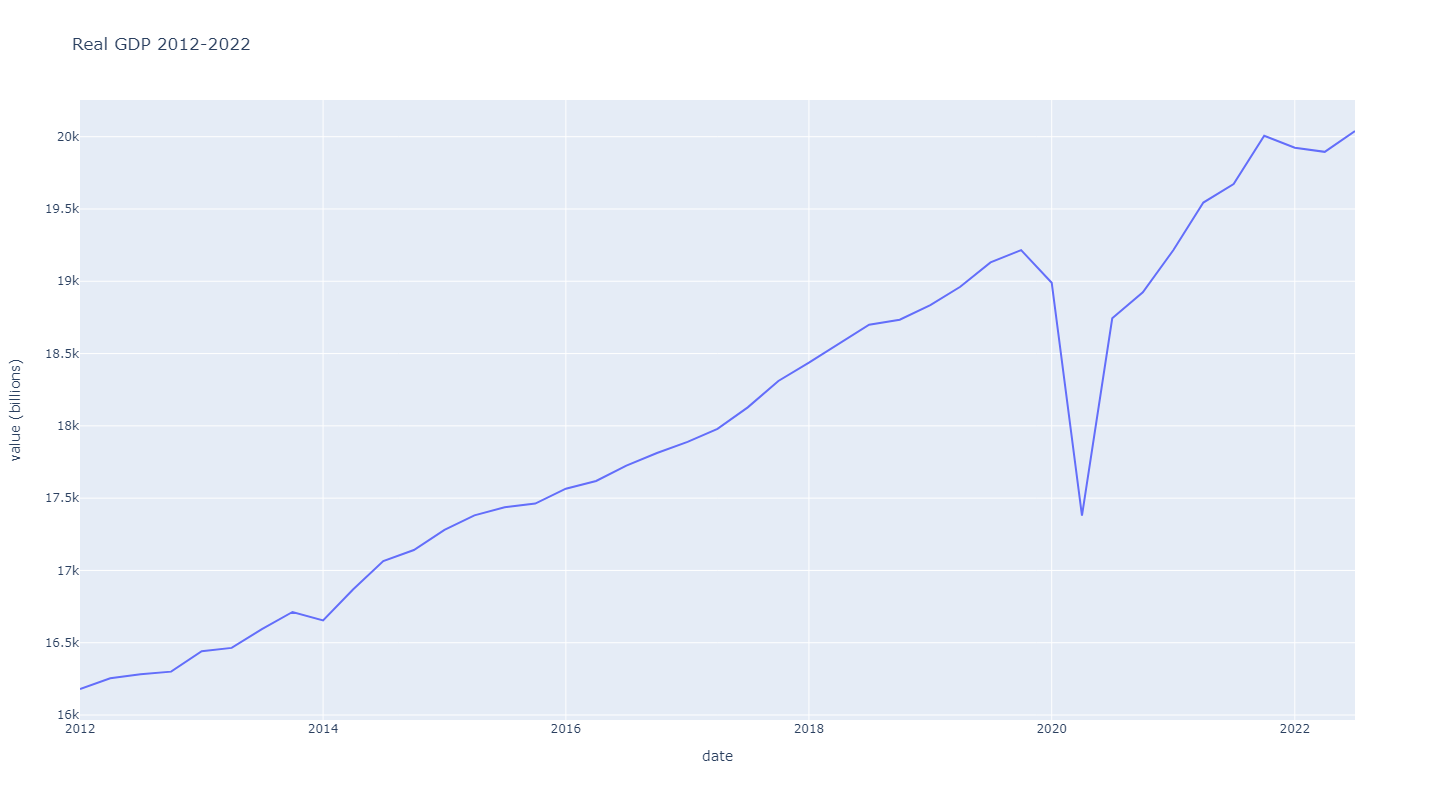

In [6]:
## Real GDP ##
real_gdp_df = pd.DataFrame(real_gdp)
real_gdp_df

labels_dict = {
    'date':'date',
    'value':'value (billions)'
}

fig = px.line(real_gdp_df, x='date', y='value', title='Real GDP 2012-2022', width=1400, height=800, labels=labels_dict)
fig.show()

### Consumer Price Index ###
The Consumer Price Index is a measure of the average change over time in the prices for a market basket of consumer goods and services. The CPI is one of the most popular measures of inflation that is closely followed by policymakers, financial markets, and businesses. 

I found an article on investopedia that describes how the market basket of goods/services work here: https://www.investopedia.com/terms/c/consumerpriceindex.asp
but I'll try my best to summarize it below:
- The Bureau of Labor Statistics (BLS) collects about 93,000 prices monthly from around 23,000 retail and services businesses to create the market basket of goods
- The market basket is calculated with the weighted average of goods and services, with popular goods/services weighted more then less popular ones
- Substitution effects exist when consumers purchase cheaper alternative goods and services when prices rise 
- The Consumer price Index for all Urban Consumers (CPI - U) represents 93% of the US living in urban/suburban locations. This is the basis for all CPI reporting 
- The CPI is updated every month 

How to calculate CPI?
At the most fundamental level, the CPI is calculated by the following formula 
$$ Annual CPI = \frac{Value of Basket In Current Year}{Value of Basket In Previous Year} * 100 $$

To calculate inflation we can use the new CPI and the Prior CPI for our calculations
$$ Inflation Rate = \frac{New CPI - Prior CPI} {Prior CPI} $$

#### Inflation ####
Ok now we know what the CPI is and how to get it, but why does it actually matter? 
It turns out that inflation has a pretty big impact on the economy and the stock market. Heres the idea: if inflation increases that means prices for goods/services are increasing, eventually people won't be able to afford buying more expensive products and will buy less things, leading to a slowdown in spending activity, and slower economic growth. Sounds bad right?

Well... it turns out many economists believe that some inflation is a good thing, and the Federal Reserve (the US central bank that controls our money supply) has a 2% target annual inflation rate based on the Consumer Price index. I honestly don't know how they chose that number and there seems to be a lot of information for and against inflation so I'll leave you with this reading I found that disucsses this topic: https://www.investopedia.com/ask/answers/111414/how-can-inflation-be-good-economy.asp.

If we compare the graph below to the Real GDP graph above we can see the effects of high inflation on economic output in 2022. There was record high inflation in Q1 and Q2 of 2022 which is when real GDP started to plateu in the graph above

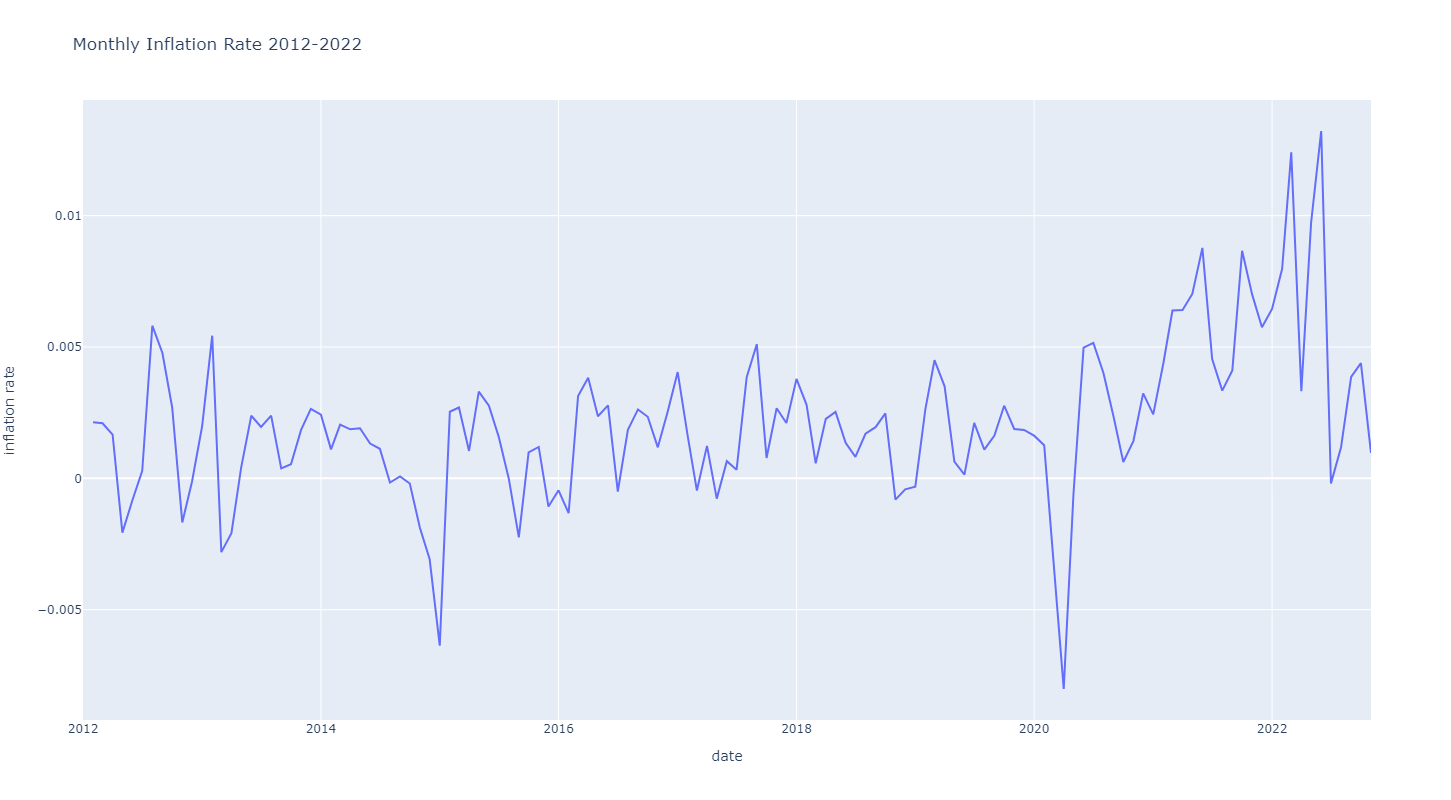

In [7]:
## CPI ##
cpi_df = pd.DataFrame(cpi)

# Calculate Inflation Rate using Inflation Rate Formula #
cpi_df['inflation_rate'] = ((cpi_df.value - cpi_df.value.shift(1)) / cpi_df.value.shift(1))

labels_dict = {
    'date':'date',
    'inflation_rate': 'inflation rate'
}
fig = px.line(cpi_df, x='date', y='inflation_rate', title='Monthly Inflation Rate 2012-2022', width=1400, height=800, labels=labels_dict)
fig.show()

### Consumer Sentiment ###
The final metric that we're going to look at is Consumer Sentiment, which is just how optimistic people feel about their finances and the state of the economy. More details can be found here: http://www.sca.isr.umich.edu/ 

Pretty much, the University of Michigan surveyed a bunch of consumers and created an index from 0 to 100 that measures that optimism about the economy.

After plotting sentiment below its apparent that consumer sentiment is the lowest it's been in the past decade, even lower than COVID times. Comparing this graph the the Real GDP graph there seems to be correlation between the economic growth measured by GDP and the overall consumer sentiment

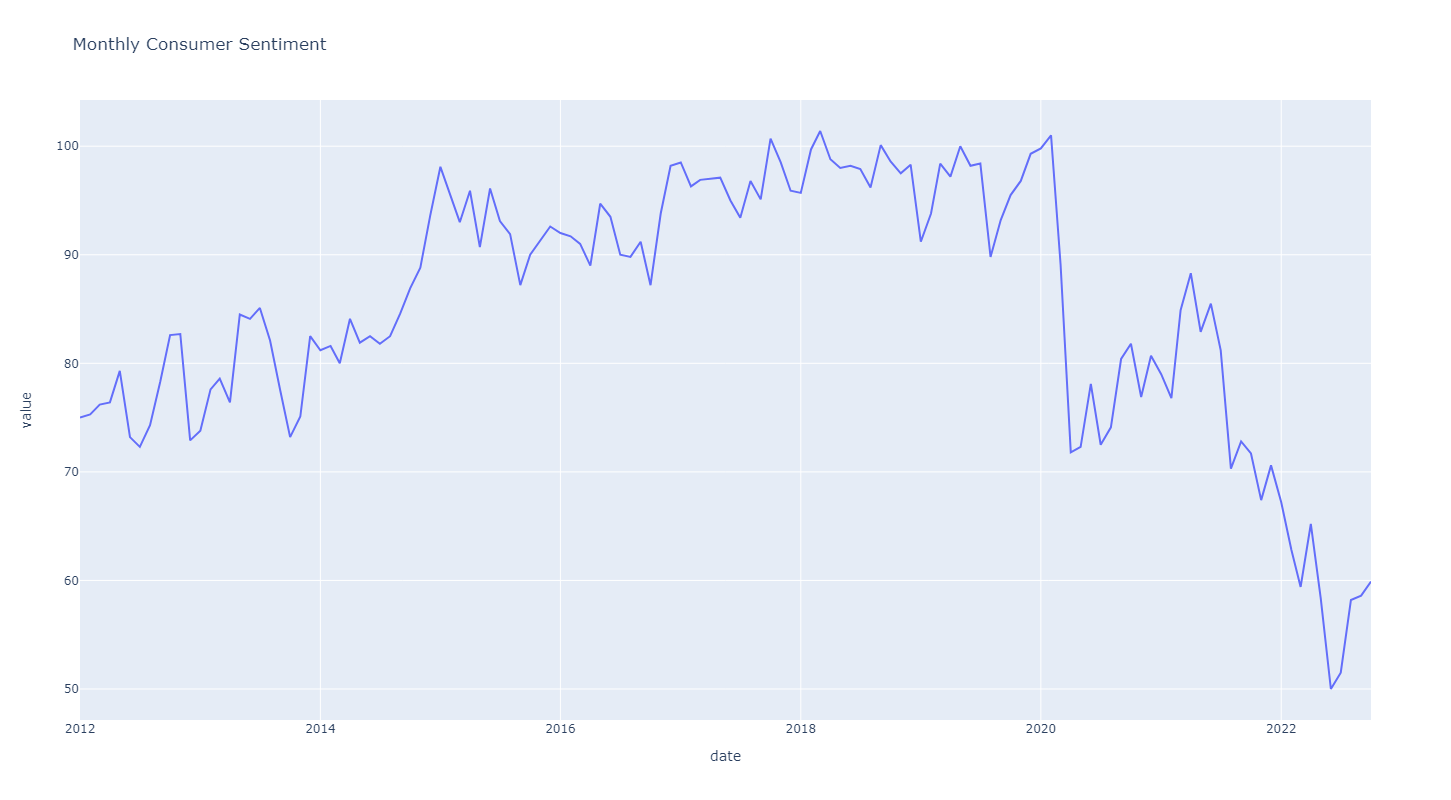

In [8]:
## Consumer Sentiment ##
consumer_sentiment_df = pd.DataFrame(consumer_sentiment)
fig = px.line(consumer_sentiment_df, x='date', y='value',title='Monthly Consumer Sentiment', width=1400, height=800,labels=labels_dict)

fig.show()

### Checkpoint ###
This is only the beginning of our analysis, we haven't even touched anything META related, but its really important that now we have a basic idea of the current state of the economy is in. Inflationary pressures, War in Europe, and many other factors that we haven't even touched upon are threatening the market. So far the economic statement is trending downwards with high inflation, slow-growing GDP output, and falling consumer sentiment. In the next step let's see how META is positined in all of this? 

## Meta Overview ##
You've probably heard of META right? Used to be called Facebook, and owns some of the top social media platforms like WhatsApp, Instagram, and Facebook. In 2021 the Facebook decided to change it's name to META and put hella resources towards VR and AR technology in their Readlity Labs Division. Today the company opeartes in two segments. The Family of Apps(Instagram, Facebook, WhatsApp) and Reality Labs(VR, AR, Metaverse)

#### Business Model ####
The Core Business Model of Meta Platforms revolves around advertising among it's Family of Apps. While it is trying to expand its Virtual Reality presence almost 90% of META's revenue is from advertising. Historically Meta has been active in Mergers & Aquistions, aquiring well-known businesses today like WhatsApp, Instagram, and Oculus. 

#### Legal Troubles ####
Meta has had it's fair share of legal problems over the past decade. In 2020 the Federal Trade Commission launched an antitrust lawsuit against Meta alleging that Meta holds monopolistic power in the US social netowrking market. There have also been countless lawsuits against Meta on violating privacy laws in the US and other countries. There's a few videos of Mark Zuckerburg floating around testifying in Congress in a 2018 Congressional hearing describing how Meta is taking steps to protect privacy. Since hearing, Meta still has problems with privacy, and misinformation lol.

- wiki: https://en.wikipedia.org/wiki/Lawsuits_involving_Meta_Platforms
- hearing: https://www.youtube.com/watch?v=EgI_KAkSyCw&ab_channel=CNET

~ In one of Max's lecture recently we talked about some of the ethical issues that Meta has faced in the pass, specifically Facebook's faciliation of a genocide in Myanmar which is really fucked up. Apparently the government was creating sham accounts to spread propoganda against muslims to help fuel their motivations.
Read about it here: https://www.nytimes.com/2018/10/15/technology/myanmar-facebook-genocide.html
The ethics of Facebook, and social media as a whole are questionable, especially when it comes to mental health. As an investor, it's up to you to decide whether you want to invest in a certain type of company. 

#### Recent Events ####
Before we dive deeper into some fundamental analysis I'll make it clear that META right now isn't doing so hot. Reality Labs is bleeding money and many investors believe this pivot towards the Metaverse is a mistake. Since the beginning of the year META's stock price has declined more than 50% and reached under $100 in October, the lowest it's been in the past 5 years. This is just surface level news headlines, let's see whats really happening behind the scenes!



## Financial Statements ##
Let's start by analyzing microeconomic factors related to META and it's underlying business. The industry standard way to go about this is to analyze a company's three core financial statements:
1. Income Statement (Company performance over time)
2. Balance Sheet (Snapshot of Company's value at one time)
3. Cash Flow Statement (Flow of cash in Company over time) 

Each statement will provide us with important information about META to help us with our analysis. Three of the most important techniques when analyzing these financial statements are as follows:
1. Horizontal Analysis - comparing data horizontally across time
2. Vertical Analysis - comparing data vertically at one point in time to see effects on different aspects of business
3. Ratio Analysis - use ratio metrics to caluclate statistical analysis

We will use the data we get from the these statements to evaluate META's intrinsic value, performance, and compare it with other companies in the same/similar industries and the stock market as a whole. Let's GOoooOOO :D  

In [9]:
#### Getting Financial Statement Data from FMP API ####

## Annual Data ##
balance_sheet_annual = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/META?&limit=10&apikey={APIKEY}")
income_statement_annual = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/income-statement/META?&limit=10&apikey={APIKEY}")
cash_statement_annual = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/cash-flow-statement/META?&limit=10&apikey={APIKEY}")
## Quarterly Data ##
balance_sheet_quarter = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement/META?&period=quarter&limit=15&apikey={APIKEY}")
income_statement_quarter = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/income-statement/META?&period=quarter&limit=15&apikey={APIKEY}")
cash_statement_quarter = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/cash-flow-statement/META?&period=quarter&limit=15&apikey={APIKEY}")

balance_sheet_annual_as_reported = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/balance-sheet-statement-as-reported/META?&apikey={APIKEY}")
## Daily Pricing data
price = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/historical-price-full/META?from=2012-12-31&to=2022-12-7&apikey={APIKEY}")

balance_sheet_annual.reverse()
income_statement_annual.reverse()
cash_statement_annual.reverse()
balance_sheet_quarter.reverse()
income_statement_quarter.reverse()
cash_statement_quarter.reverse()

## Balance Sheet ##
The first statement we are going to examine is the balance sheet, a statement that is structured into Assets, Liabilities, and Shareholder Equity. This idea of assets, liabilites, and shareholders Equity is one of the fundamental concepts of accouting, according to my accounting professor, shoutout Prof. Bassu and McMillan. Here's some quick definitions:
- Assets: What the company owns
- Liabilities: What the company owes
- Shareholder Equity: What the company owns - What the company owes

These definitions lead to the fundamental accounting equation

$$ Assets = Liabilities + Shareholders Equity $$

**Ok but what does this mean and why do we care?**
Well, it turns out that investors like Warren Buffet really really care about something called **Book Value** which is the net value of a firm's assets found on its balance sheet, meaning **assets - liabilites** which is actaully just the **shareholders equity**. Another way to think of **Book Value** is the money that investors would get if META was to sell everything it owned today and paid off its debts. A mathmatical formula follows:

$$Book Value = Total Assets - Total Liabilities$$

In [10]:
## balance sheet data
balance_sheet_df_quarter = pd.DataFrame(balance_sheet_quarter)
balance_sheet_df_annual = pd.DataFrame(balance_sheet_annual)
balance_sheet_df_annual_as_reported = pd.DataFrame(balance_sheet_annual_as_reported)
balance_sheet_df_annual_as_reported


date symbol period   liabilities  additionalpaidincapital  \
0  2021-12-31   META     FY  4.110800e+10             5.581100e+10   
1  2020-12-31   META     FY  3.102600e+10                      NaN   
2  2019-12-31   META     FY  3.232200e+10             4.585100e+10   
3  2018-12-31   META     FY  1.320700e+10             4.290600e+10   
4  2017-12-31   META     FY  1.017700e+10             4.058400e+10   
5  2016-12-31   META     FY  5.767000e+09             3.822700e+10   

   accountspayabletradecurrent  prepaidexpenseandotherassetscurrent  \
0                 4.083000e+09                         4.629000e+09   
1                 1.093000e+09                                  NaN   
2                 8.860000e+08                         1.852000e+09   
3                          NaN                         1.779000e+09   
4                          NaN                         1.020000e+09   
5                          NaN                         9.590000e+08   

   liabilitiesandstockholdersequity  commonstocksharesauthorized  \
0                      1.659870e+11                 5.000000e+09   
1                      1.593160e+11                 5.000000e+09   
2                      1.333760e+11                 5.000000e+09   
3                      9.733400e+10                 5.000000e+09   
4                      8.452400e+10                 5.000000e+09   
5                      6.496100e+10                 5.000000e+09   

   cashandcashequivalentsatcarryingvalue  ...  \
0                           1.660100e+10  ...   
1                           1.757600e+10  ...   
2                           1.907900e+10  ...   
3                           1.001900e+10  ...   
4                           8.079000e+09  ...   
5                           8.903000e+09  ...   

   contractwithcustomerliabilitycurrent  accountspayablecurrent  \
0                                   NaN                     NaN   
1                           382000000.0            1.331000e+09   
2                           269000000.0            1.363000e+09   
3                           147000000.0            8.200000e+08   
4                                   NaN            3.800000e+08   
5                                   NaN            3.020000e+08   

   allowancefordoubtfulaccountsreceivablecurrent  accruedliabilitiescurrent  \
0                                            NaN                        NaN   
1                                    114000000.0                        NaN   
2                                    206000000.0               1.173500e+10   
3                                    229000000.0               5.509000e+09   
4                                    189000000.0               2.892000e+09   
5                                     94000000.0               2.203000e+09   

   propertyplantandequipmentnet  marketablesecuritiescurrent  \
0                           NaN                          NaN   
1                           NaN                          NaN   
2                           NaN                          NaN   
3                  2.468300e+10                          NaN   
4                  1.372100e+10                 3.363200e+10   
5                  8.591000e+09                 2.054600e+10   

   deferredrevenueandcreditscurrent  outstandingsharessubjecttorepurchase  \
0                               NaN                                   NaN   
1                               NaN                                   NaN   
2                               NaN                                   NaN   
3                               NaN                                   NaN   
4                        98000000.0                                   NaN   
5                        90000000.0                             4000000.0   

   capitalleaseobligationscurrent  capitalleaseobligationsnoncurrent  
0                             NaN                                NaN  
1                             NaN           

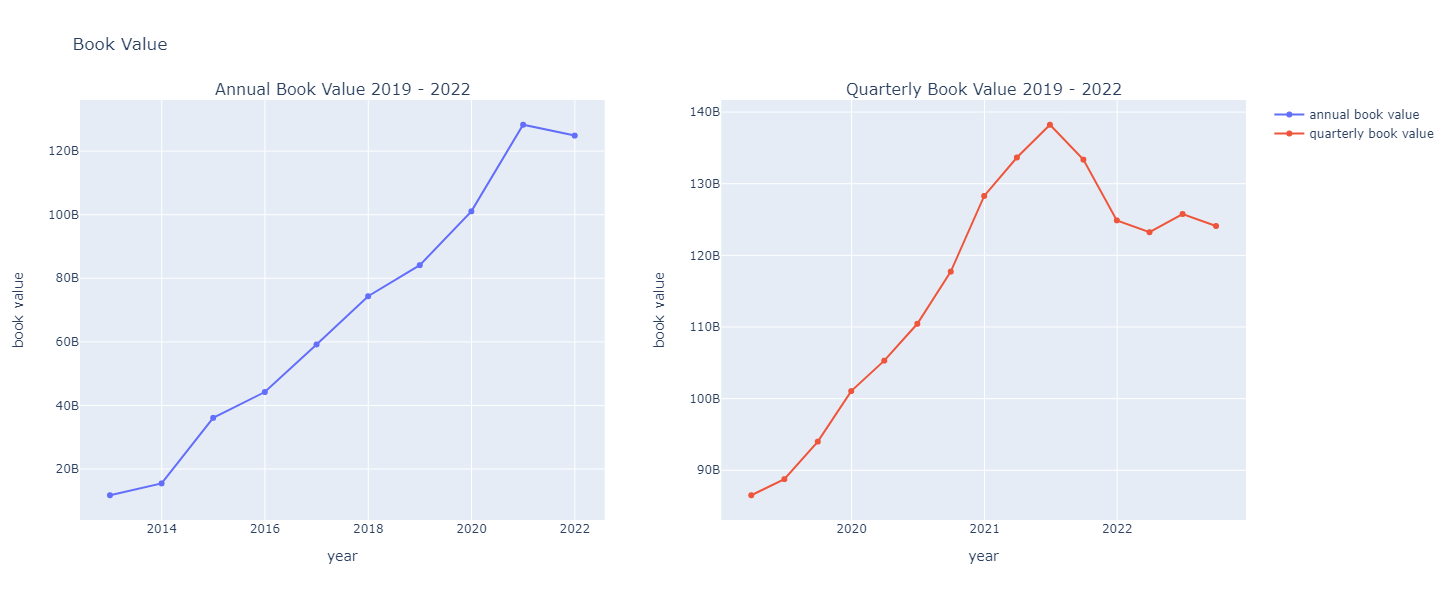

In [17]:
## Plot Book Value
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2, subplot_titles=("Annual Book Value 2019 - 2022", "Quarterly Book Value 2019 - 2022"), column_widths=[0.5, 0.5])

fig.add_trace(
    go.Scatter(x=balance_sheet_df_annual['date'], y=balance_sheet_df_annual['totalStockholdersEquity'], name='annual book value'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=balance_sheet_df_quarter['date'], y=balance_sheet_df_quarter['totalStockholdersEquity'], name='quarterly book value'),
    row=1, col=2
)

fig.update_layout(height=600, width=1400, title_text="Book Value")
fig.update_xaxes(title_text="year", row=1, col=1)
fig.update_xaxes(title_text="year", row=1, col=2)
fig.update_yaxes(title_text="book value", row=1, col=1)
fig.update_yaxes(title_text="book value", row=1, col=2)
fig.show()

A company's book value is helpful for investors to determine if the company is currently undervalued by comparing it's book value per share to its market value per share(the current stock price). This makes sense right? The book value is how much the company is worth on the balance sheet which is grounded with regulated accouting principles versus the market value which has little fundamental grounding. To calculate book value per share we can do:
$$ Book Value Per Share  = \frac{Book Value}{Total Shares Outstanding} $$

Note about the formula: Total Shares outstanding just means the amount of stock that is being issued by the company, luckily this can be found in a company's balance sheet!

Once we have META's Book Value Per Share let's compare it with the Market Value Per Share to see how the market is currently pricing it's book value. Investors use a ratio called price to book ratio like so:
$$ Price To Book Ratio = \frac{Market Value Per Share}{Book Value Per Share} $$

**Note** for some reason FMP doesn't have common stock outstanding on its Balance Sheet API so let's try scraping the web for that information.
Found a website that has the relevant information: https://www.macrotrends.net/stocks/charts/META/meta-platforms/shares-outstanding

In [18]:
## Scrape Shares Outstanding from the Web ##
from bs4 import BeautifulSoup
import requests

page = requests.get("https://www.macrotrends.net/stocks/charts/META/meta-platforms/shares-outstanding")
soup = BeautifulSoup(page.content, 'html.parser')      

# Create dataframe
shares_outstanding = soup.find('table')        #find table html tag
shares_outstanding_df = pd.read_html(str(shares_outstanding))[0]

# Modify dataframe 
shares_outstanding_df.columns = ['year', 'shares_outstanding']
shares_outstanding_df = shares_outstanding_df.truncate(after=9, axis=0)
shares_outstanding_df = shares_outstanding_df[::-1] # reverse order
shares_outstanding_df['shares_outstanding'] = shares_outstanding_df['shares_outstanding'] * 1000000
shares_outstanding_df

year  shares_outstanding
9  2012          2166000000
8  2013          2517000000
7  2014          2664000000
6  2015          2853000000
5  2016          2925000000
4  2017          2956000000
3  2018          2921000000
2  2019          2876000000
1  2020          2888000000
0  2021          2859000000

In [19]:
##Price to Book Value calculations

book_value_df = pd.DataFrame(balance_sheet_df_annual['calendarYear'])
book_value_df['date'] = balance_sheet_df_annual['date']
book_value_df['book_value'] = balance_sheet_df_annual['totalStockholdersEquity']
dates = str(book_value_df['date'])

# create list of price data, note that I manually insert the prices for 2016 and 2017 because markets were closed
# these prices are the closing price for the day
pricing = [round(date['close'], 2) for date in price['historical'] if date['date'] in dates]
#index 4 = 2016 index 5 = 2017
## 2017 Dec 28 176.46 2016 Dec 30 115.05
pricing.reverse()
pricing.insert(4, 115.05)
pricing.insert(5, 176.46)

# book value calculations
book_value_df['market_value_per_share'] = pricing
book_value_df['book_value_per_share'] = book_value_df['book_value'] / shares_outstanding_df['shares_outstanding']
book_value_df['price_to_book_ratio'] = round(book_value_df['market_value_per_share'] / book_value_df['book_value_per_share'], 4)
book_value_df
# price['historical']

calendarYear        date    book_value  market_value_per_share  \
0         2012  2012-12-31   11755000000                   26.62   
1         2013  2013-12-31   15470000000                   54.65   
2         2014  2014-12-31   36096000000                   78.02   
3         2015  2015-12-31   44218000000                  104.66   
4         2016  2016-12-31   59194000000                  115.05   
5         2017  2017-12-31   74347000000                  176.46   
6         2018  2018-12-31   84127000000                  131.09   
7         2019  2019-12-31  101054000000                  205.25   
8         2020  2020-12-31  128290000000                  273.16   
9         2021  2021-12-31  124879000000                  336.35   

   book_value_per_share  price_to_book_ratio  
0              4.111577               6.4744  
1              5.356648              10.2023  
2             12.550765               6.2164  
3             15.137966               6.9137  
4             20.025034               5.7453  
5             25.417778               6.9424  
6             29.487206               4.4457  
7             37.933183               5.4108  
8             50.969408               5.3593  
9             57.654201               5.8339

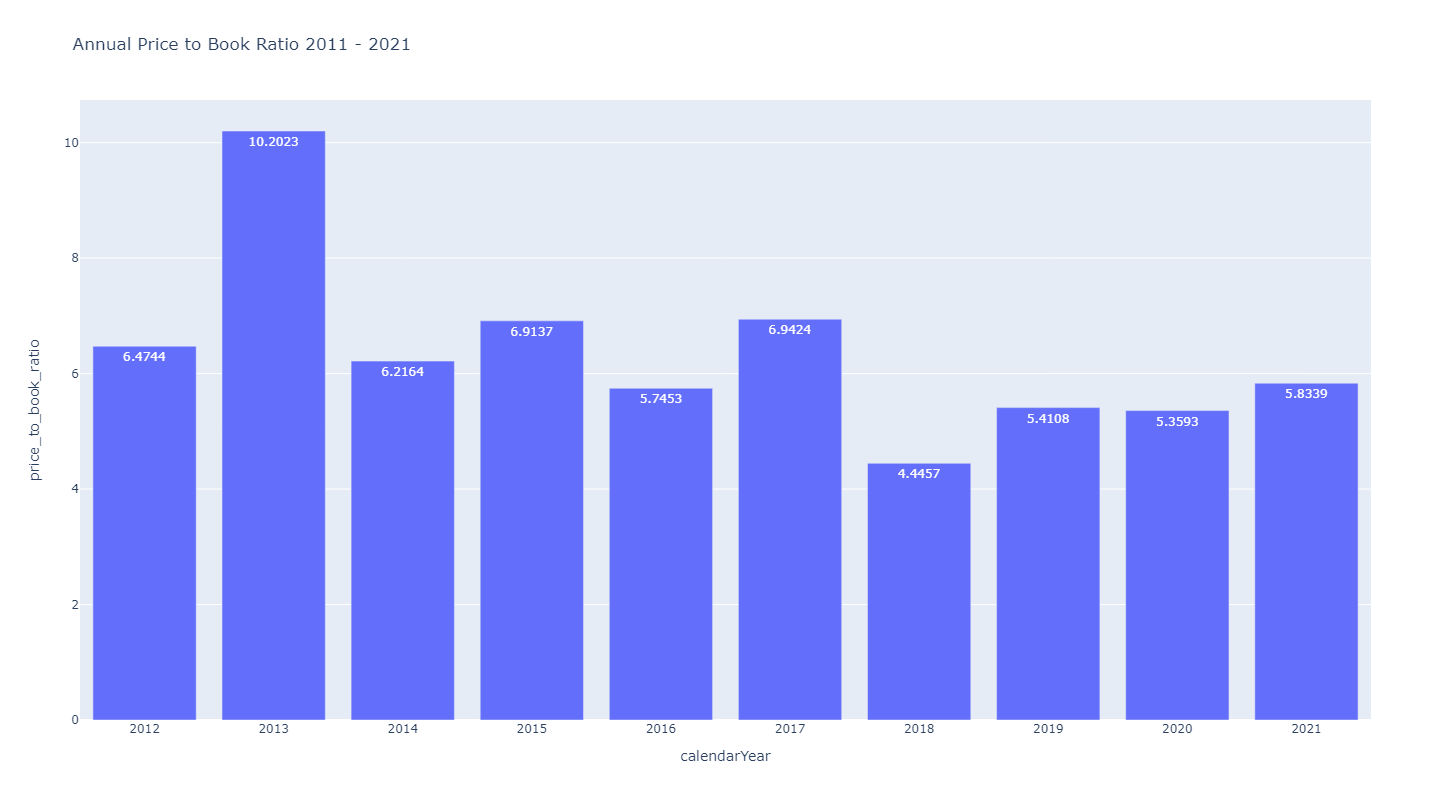

In [20]:
fig = px.bar(book_value_df, x = 'calendarYear', y = 'price_to_book_ratio', width = 1400, height = 800, text_auto=True, title='Annual Price to Book Ratio 2011 - 2021')
fig.show()

##note that the dates are wrong!!!

Ok so Meta's price to book ratio has been consistently over 1 in the past 10 years meaning that the market value of each share of stock is greater than the book value of each share of stock. For value investors having low price to book ratio under 1 is a good sign that the stock is undervalued. With a high price to book value ratio investors may think that Meta has a lot more to offer than just its reportable assets which makes sense because Meta has so much innovative software that it's hard to report a tangible number for it. 

The balance sheet can also help us analyze **Gearing Ratios** which are financial ratios that compare some form of owner's equity to debt. **Gearing** is a measurement of a company's fianancial **leverage**. Think of **leverge** as a company borrowing money, so essentially it's debt. These **Gearing Ratios** are helpful to understand how much of META is being financed with debt and how much is being financed with equity(stock, retained earnings)

An industry standard ratio is **Debt to Equity Ratio** that compares debt and equity to assess how much a company relies on debt to run its operations.
$$DebtToEquityRatio = \frac{TotalLiabilities}{TotalShareholders'Equity}$$

Let's use this to analyze META's capital structure

In [21]:
df = pd.DataFrame(balance_sheet_df_annual['calendarYear'])
df['debt_to_equity_ratio'] = round(balance_sheet_df_annual['totalLiabilities'] / balance_sheet_df_annual['totalStockholdersEquity'], 4)
df

calendarYear  debt_to_equity_ratio
0         2012                0.2848
1         2013                0.1568
2         2014                0.1133
3         2015                0.1174
4         2016                0.0974
5         2017                0.1369
6         2018                0.1570
7         2019                0.3198
8         2020                0.2418
9         2021                0.3292

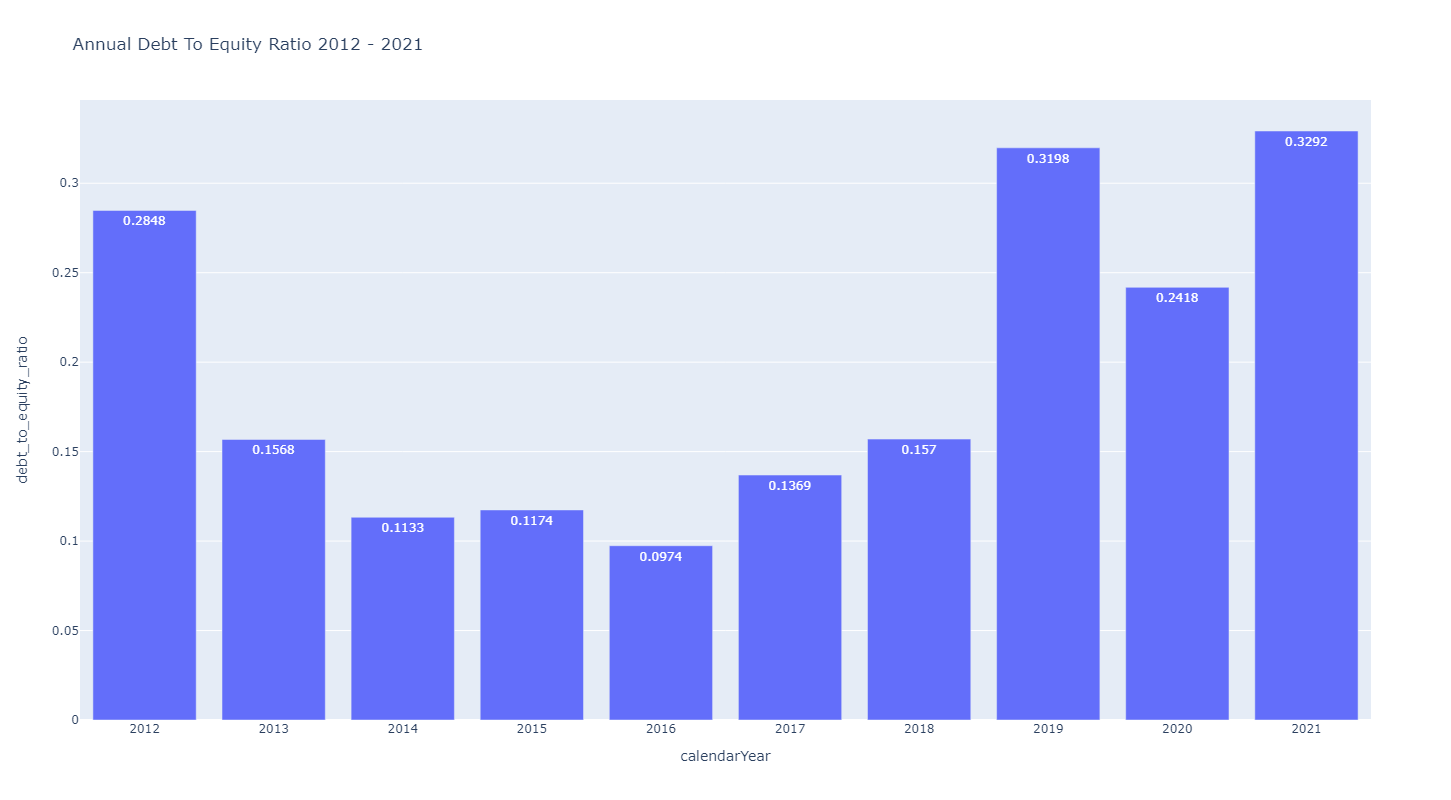

In [22]:
fig = px.bar(df, x='calendarYear',y='debt_to_equity_ratio', width = 1400, height = 800, text_auto=True, title='Annual Debt To Equity Ratio 2012 - 2021')
fig.show()

For the past 10 years META has consistently had a Debt to Equity ratio lower than 1, meaning that it financed more than half of it's operations through non-debt obligations, like issuing new stock or using retained earnings. Having a low ratio can indicate that an investment in META is less risky because what the company owns is greater than what it owes. This also means that Meta is free to use it's capital for business improving purposes instead of having to pay back any debt obligations which can eat away a company's earnings. 

## Income Statement ##
The next financial statement we are going to look at is the Income Statement. Previously we examined the balance sheet that showed us a snapshot of the company at one point in time. The income statement will show us how well the company is doing over time. At it's core, an income statement can be broken into three pieces:

1. Income: How much the company is making
2. Expenses: How much the company is Spending
3. Earnings: Gains or Losses of the company

In our analysis of Meta lets start by analyzing it's income in the past 10 years and the past 10 quarters

In [23]:
income_statement_df_annual = pd.DataFrame(income_statement_annual)
income_statement_df_quarter = pd.DataFrame(income_statement_quarter)

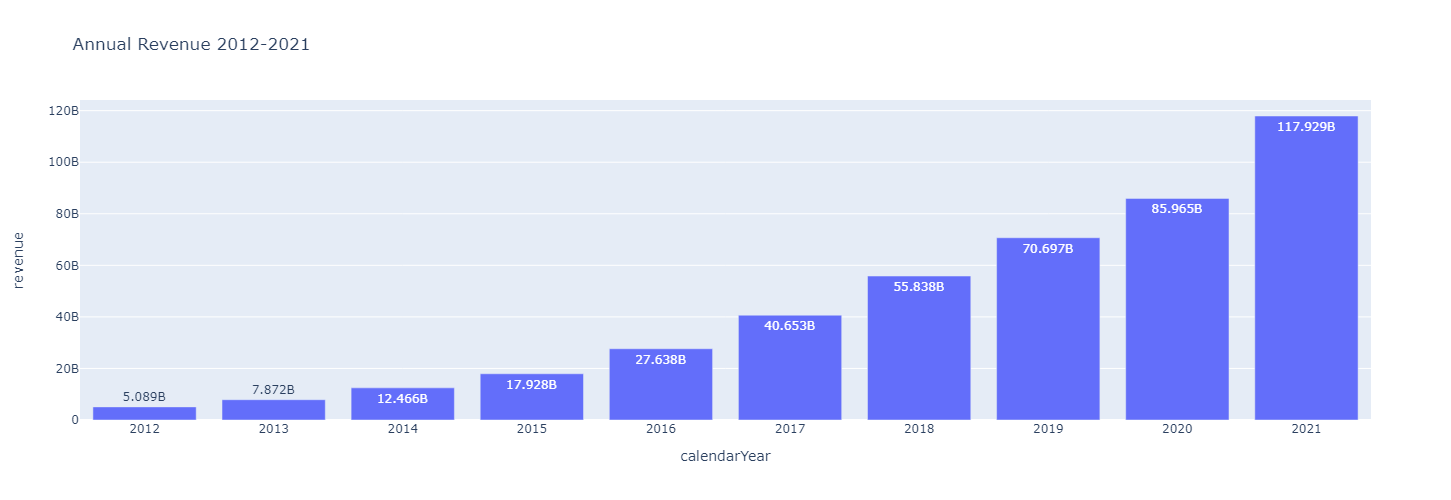

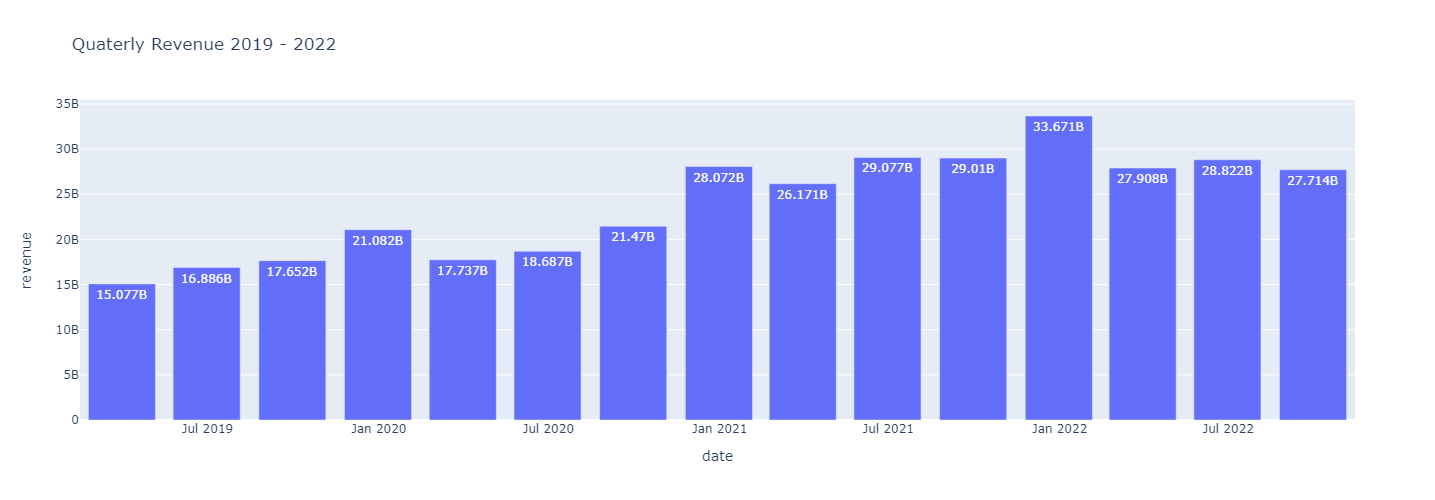

In [24]:
## Annual Revenue
fig = px.bar(income_statement_df_annual, x='calendarYear', y='revenue', title="Annual Revenue 2012-2021", text_auto=True, height = 500)
fig.show()

## Quarterly Revenue
fig = px.bar(income_statement_df_quarter, x='date', y='revenue', title="Quaterly Revenue 2019 - 2022", text_auto=True, height = 500)
fig.show()

From an annual perspective Meta's revenue looks very healthy with consistent growth year over year. However, the Quarterly data shows that Meta had a drop in revenue for the first time in three years in the 3rd Quarter (July - Sept) of 2022. We can also see a drop in revenue from the 4th Quarter (October - December) last year (2021) and first Quarter (Jan - March) this year (2022) which was when the stock price crashed by more than 25%. Judging by the graph patterns, Meta consistently makes the most sales in the 4th Quarter. 

## Gross Profit ##
**Gross Profit** is an important measure of determining **margin** which is how much money Meta makes after considering how much it spends on it's core business proudcts/services (**Cost Of Revenue**). For Meta, some expenses they may incur to produce their family of app services are engineer salaries and engineer salaries. On the reality lab's side any materials and production expenses that goes towards producing VR headsets are included in **Cost of Revenue**

$$ Gross Profit = Revenue - Cost Of Revenue $$

Income Statements should already have calculations of Gross Profit so we can just pull that in using the FMP API

In [25]:
gross_profit_df_annual = pd.DataFrame(income_statement_df_annual['calendarYear'])
gross_profit_df_annual['gross_profit'] = income_statement_df_annual['grossProfit']

gross_profit_df_quarter = pd.DataFrame(income_statement_df_quarter['date'])
gross_profit_df_quarter['gross_profit'] = income_statement_df_quarter['grossProfit']

For a more rigerous analysis of **Gross Profit** let's calculate the **Gross Profit Margin** to see how efficient Meta is in allocating it's capital/resources to produce its core products. 
$$ Gross Profit Margin = \frac {Gross Profit}{Revenue} $$

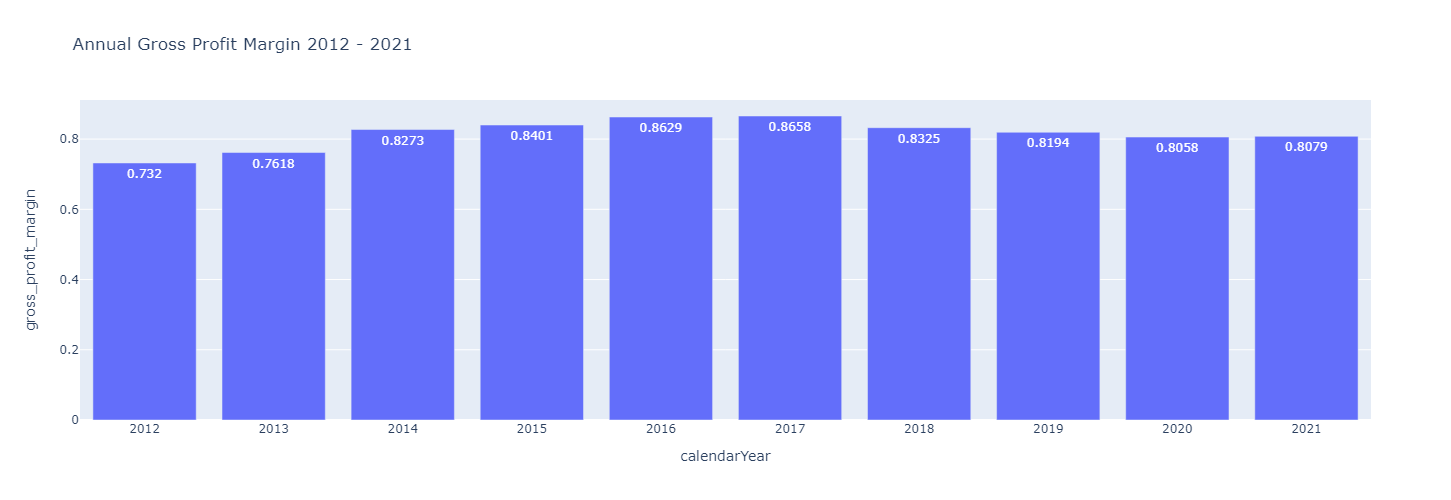

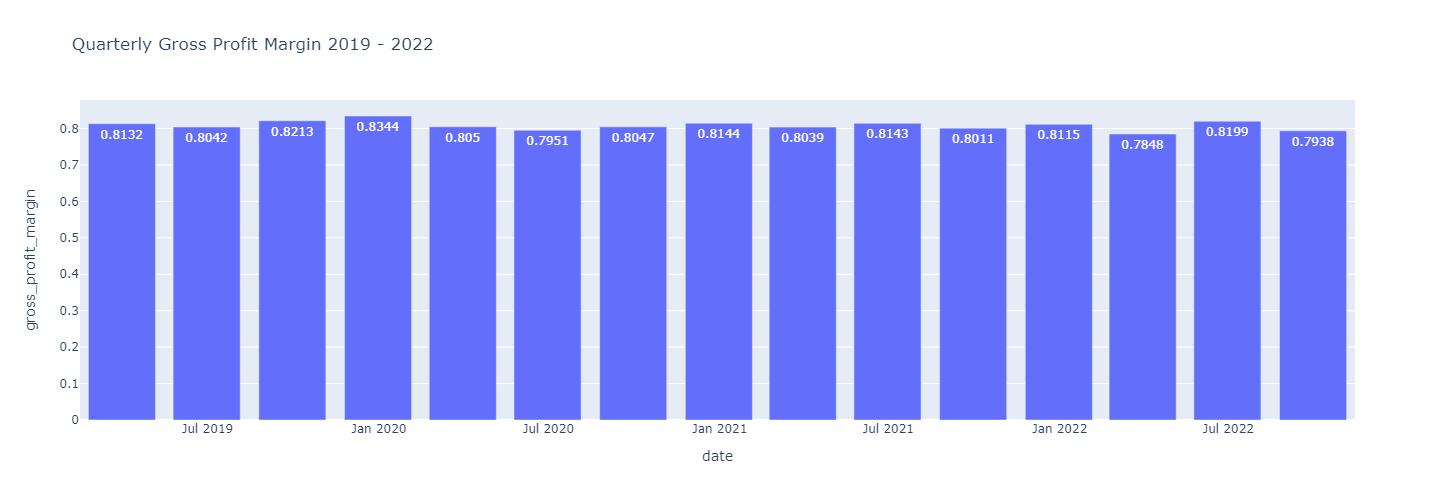

In [26]:
gross_profit_df_annual['gross_profit_margin'] = round(gross_profit_df_annual['gross_profit']/income_statement_df_annual['revenue'], 4)
gross_profit_df_quarter['gross_profit_margin'] = round(gross_profit_df_quarter['gross_profit']/income_statement_df_quarter['revenue'], 4)

fig = px.bar(gross_profit_df_annual, x='calendarYear', y='gross_profit_margin', text_auto=True, title = 'Annual Gross Profit Margin 2012 - 2021', height = 500)
fig.show()

fig = px.bar(gross_profit_df_quarter, x='date', y='gross_profit_margin', text_auto=True, title = 'Quarterly Gross Profit Margin 2019 - 2022', height = 500)
fig.show()


In the past 10 years Meta has consistently kept **Gross Margins** Above 70%. We can think of this as for every dollar that Meta makes in revenue by selling it's core products, it will cost less than 30 cents to actually make that product. Meta's primary product is software and the cost of producing software is substantially lower than producing material goods. It's valuable that Gross Margins are high so that Meta can keep as much of their revenue as possible to spend on research, operating, and selling costs. 

## Research and Development ##
I made a note before that Meta currently operates in 2 segments, the Family of Apps and Reality Labs. There have been lots of news surrounding the Reality Labs portion of Meta about it bleeding cash for the company. Let's take a look at Meta's research and developtment expenses to see what's really going on.

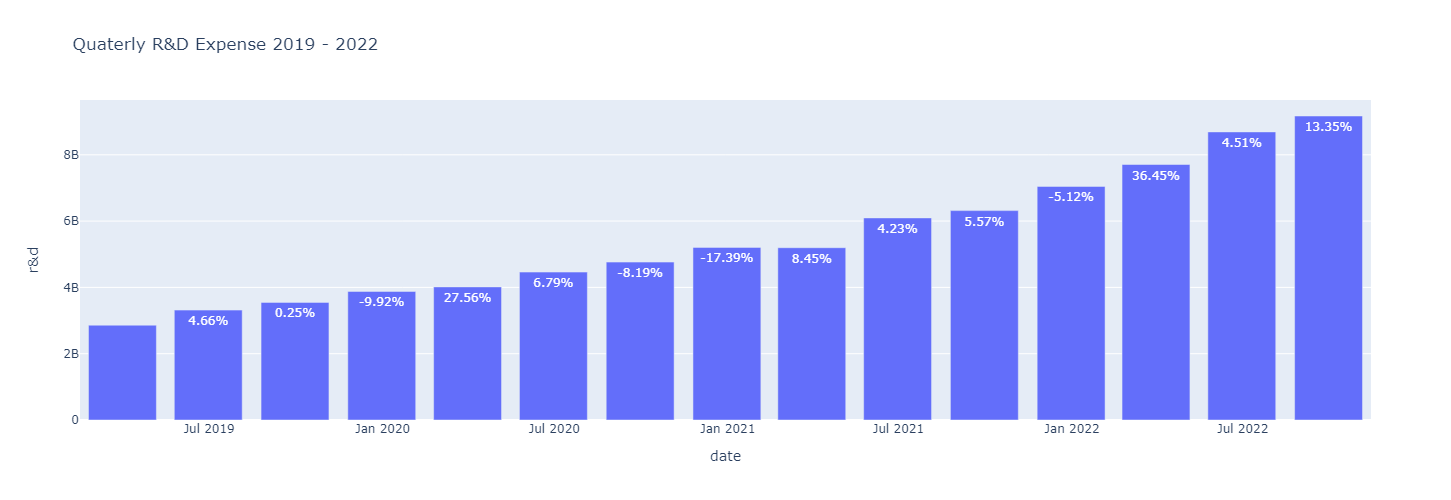

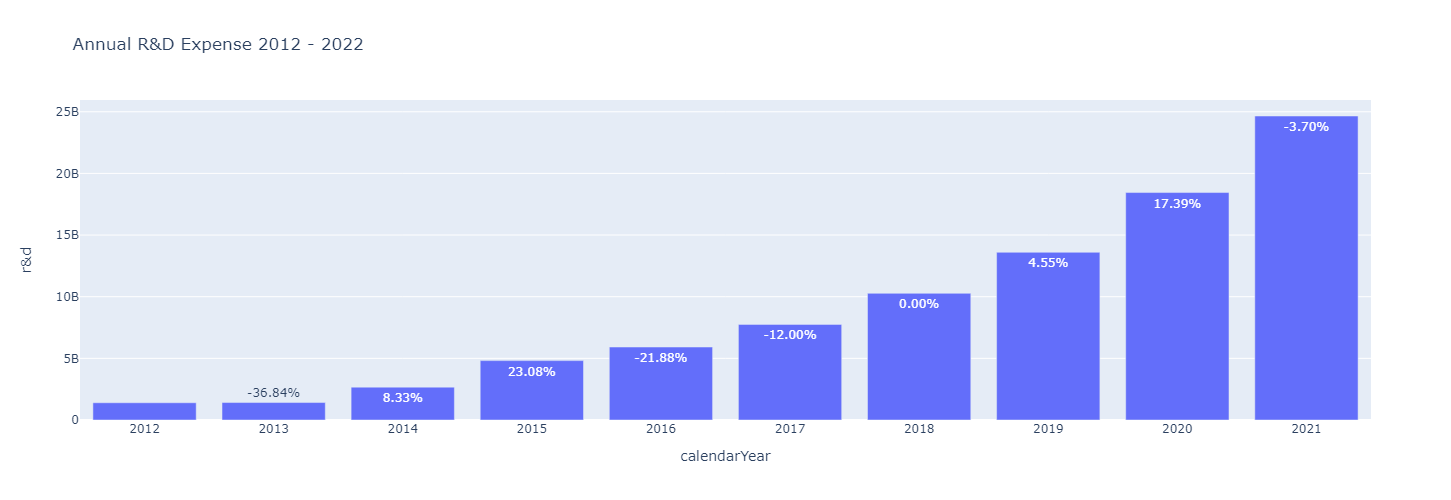

In [27]:
## Quarterly Research and Development Graph
rd_df_quarter = pd.DataFrame(income_statement_df_quarter['date'])
rd_df_quarter['r&d'] = income_statement_df_quarter['researchAndDevelopmentExpenses']

rd_df_quarter['r&d_gross_profit_ratio'] = rd_df_quarter['r&d']/gross_profit_df_quarter['gross_profit']

# Find percent change in r&d gross profit ratio
rd_df_quarter['r&d_growth'] = round((rd_df_quarter['r&d_gross_profit_ratio'] - rd_df_quarter['r&d_gross_profit_ratio'].shift(1)) /  rd_df_quarter['r&d_gross_profit_ratio'].shift(1) * 100, 4)

rd_df_quarter['r&d_growth'] = ["{:.2f}%".format(i) for i in rd_df_quarter['r&d_growth'] ]  #Doing some formatting here to turn floats to percentage
rd_df_quarter.loc[0, 'r&d_growth']= None # Setting the first date percentage growth to none because it is the base 
fig = px.bar(rd_df_quarter, x='date', y='r&d', text='r&d_growth', title = 'Quaterly R&D Expense 2019 - 2022', height=500)
fig.show()

## Annual Research and Development Graph
rd_df_annual = pd.DataFrame(income_statement_df_annual['calendarYear'])
rd_df_annual['r&d'] = income_statement_df_annual['researchAndDevelopmentExpenses']

## Get percentage growth in expense compared to base year (2012)
rd_df_annual['r&d_gross_profit_ratio'] = round(rd_df_annual['r&d']/gross_profit_df_annual['gross_profit'], 2)

rd_df_annual['r&d_growth'] = round((rd_df_annual['r&d_gross_profit_ratio'] - rd_df_annual['r&d_gross_profit_ratio'].shift(1)) / rd_df_annual['r&d_gross_profit_ratio'].shift(1) * 100, 4)
rd_df_annual['r&d_growth'] = ["{:.2f}%".format(i) for i in rd_df_annual['r&d_growth'] ]  #Doing some formatting here to turn floats to percentage
rd_df_annual.loc[0, 'r&d_growth']= None # Setting the first date percentage growth to none because it is the base 
fig = px.bar(rd_df_annual, x='calendarYear', y='r&d', text='r&d_growth', title = 'Annual R&D Expense 2012 - 2022', height=500)

fig.show()

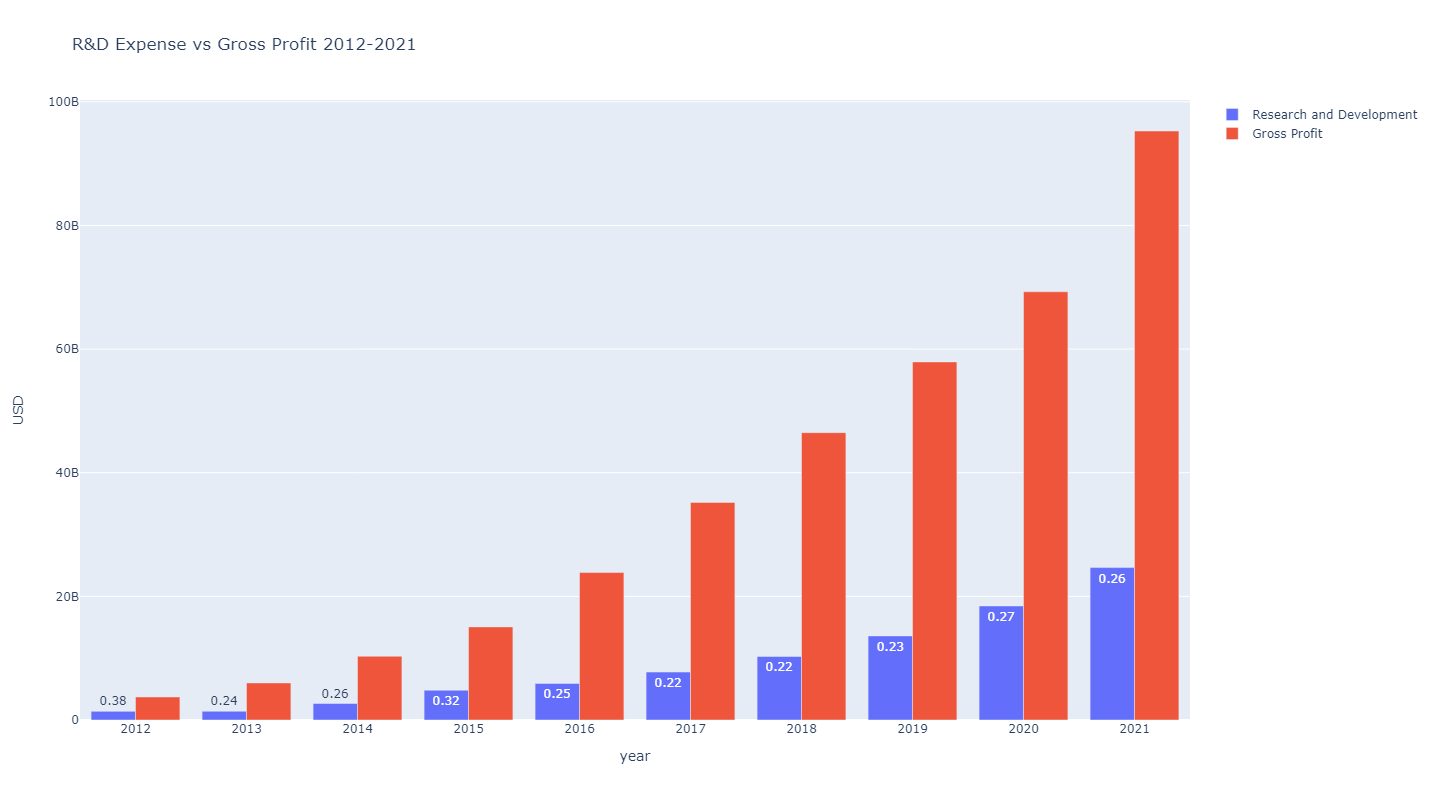

In [36]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(name='Research and Development', x=rd_df_annual['calendarYear'], y=rd_df_annual['r&d'], text=rd_df_annual['r&d_gross_profit_ratio']),
    go.Bar(name='Gross Profit', x=rd_df_annual['calendarYear'], y=gross_profit_df_annual['gross_profit'])
])
# Change the bar mode
fig.update_layout(barmode='group', height = 800, title='R&D Expense vs Gross Profit 2012-2021', xaxis_title='year', yaxis_title='USD')
fig.show()

With the 1st Quarter of 2019 as a reference for comparison, Research and Development at Meta has increased by over 200% by the end of the 3rd quarter in 2022. From 2021 to now, Meta has increased it's Research and Development Expense by 100%. Let's see how that compares to previous years... ~~~this might be wrong

Since the 2nd Quarter in 2021 Meta has ramped up it's 

even from an annual perspective growth in Research and Development Expenses has increased substantially in 2021 and will likely continue to grow as Meta pursues development of the Metaverse. This growth in R & D expense will decrease overall profitability of the company in the future, but is it a cause for concern?

### Earnings Before Interest Taxes Depreciation & Amortization (EBITDA) ###
Earnings Before Interest Taxes Depreciation & Amortization aka EBITDA is a measure of profitability by investors to help measure cash profits generated by a company's core operations by factoring out interest/tax expenses and Depreciation/Amortization. The idea here is that interest and tax payments are not related to the company's core operation so factoring out those expenses give us a better idea of how profitable Meta's core segments are. Depreciation & Amortization are also excluded because they represent non-cash expenses, meaning that no cash is being spent to incur those expenses, rather assets lose book value over time and are thus that lose is reflected through depreciation.

Let's take a look at Meta's EBITDA over the past 10 years and its growth year over year.

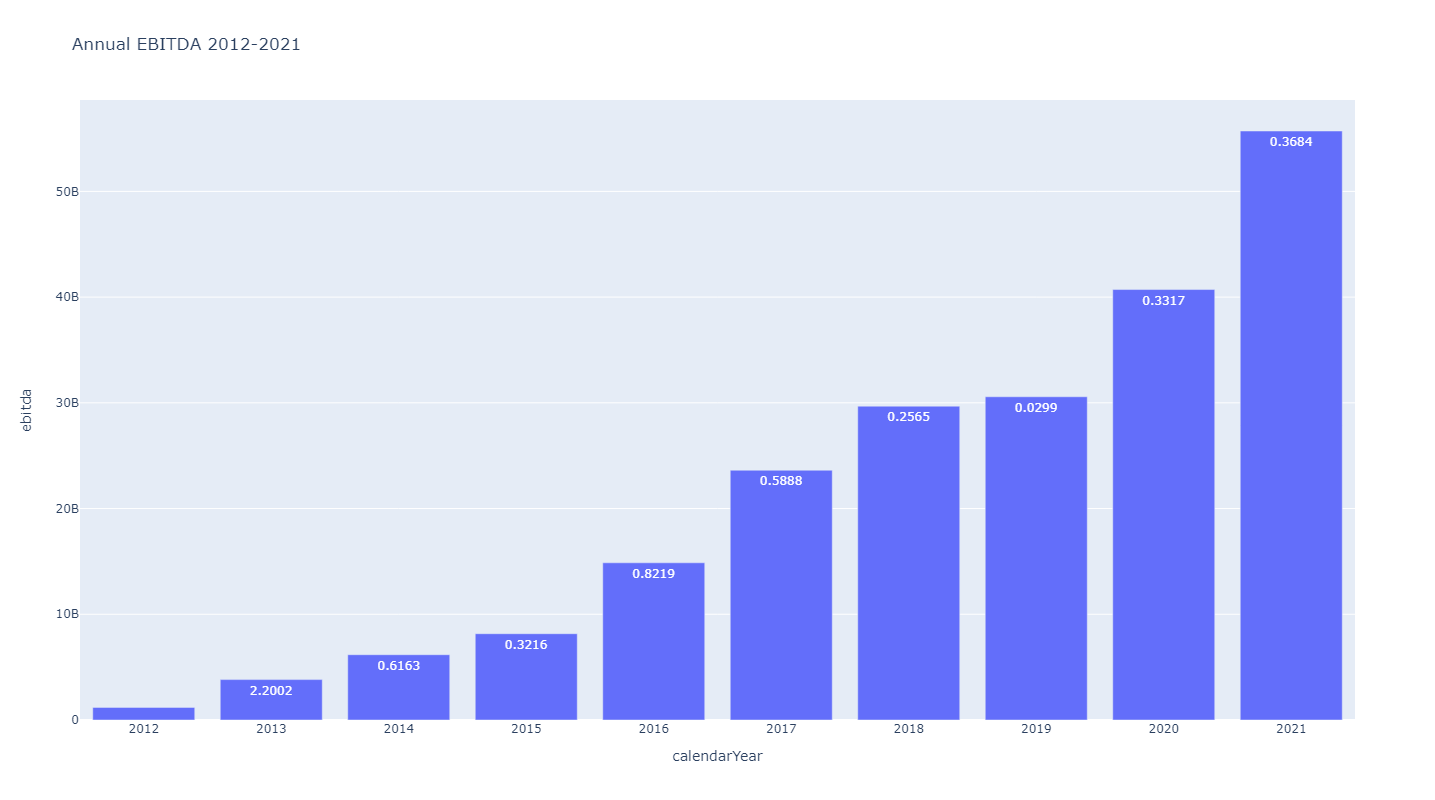

In [37]:
ebitda_df = pd.DataFrame(income_statement_df_annual['calendarYear'])
ebitda_df['ebitda'] = income_statement_df_annual['ebitda']
ebitda_df['ebitda_growth'] = round((ebitda_df['ebitda'] - ebitda_df['ebitda'].shift(1)) / ebitda_df['ebitda'].shift(1),4)
ebitda_df['ebitda_ratio'] = income_statement_df_annual['ebitdaratio']

fig = px.bar(ebitda_df, x = 'calendarYear', y = 'ebitda', text='ebitda_growth', height = 800, title='Annual EBITDA 2012-2021')
fig.show()

EBITDA as continued to increase year over year which is a very good sign indicating strong growth with Meta's overall profitablitly from operations.

### Net Income ###
The bottom line of the income statement represents the company's net income, which is the total amount of profit the company has generated during the year/quarter. We should make a note that the net profit figure isn't how much cash profit the company has generated over the time period, we will figure out how much cash profit Meta generated in our analysis of the cash flow statement. Net Income is used to calculate an important ratio **Earnings Per Share (EPS)** which is how much profit the company is generating per oustanding share of stock. Basically how much money would you earn as a shareholder if you owned just one share of the company. A higher **EPS** means that a company is able to generate more profit relative to each share of stock indicating greater company value.

$$Earnings Per Share = \frac{Net Income}{Shares Outstanding(CommonStock)} $$

In [38]:
## Scrape outstanding shares data again, but this time for quarterly shares
page = requests.get("https://www.macrotrends.net/stocks/charts/META/meta-platforms/shares-outstanding")
soup = BeautifulSoup(page.content, 'html.parser')      

# Create dataframe
shares_outstanding_quarter = soup.findAll('table')[1]        #find table html tag
shares_outstanding_df_quarter = pd.read_html(str(shares_outstanding_quarter))[0]

# Modify dataframe 
shares_outstanding_df_quarter.columns = ['year', 'shares_outstanding']
shares_outstanding_df_quarter = shares_outstanding_df_quarter.truncate(after=14, axis=0)
shares_outstanding_df_quarter = shares_outstanding_df_quarter[::-1] # reverse order
shares_outstanding_df_quarter['shares_outstanding'] = shares_outstanding_df_quarter['shares_outstanding'] * 1000000
shares_outstanding_df_quarter

year  shares_outstanding
14  2019-03-31        2.869000e+09
13  2019-06-30        2.875000e+09
12  2019-09-30        2.874000e+09
11  2019-12-31        2.876000e+09
10  2020-03-31        2.868000e+09
9   2020-06-30        2.879000e+09
8   2020-09-30        2.891000e+09
7   2020-12-31        2.888000e+09
6   2021-03-31        2.882000e+09
5   2021-06-30        2.877000e+09
4   2021-09-30        2.859000e+09
3   2021-12-31        2.859000e+09
2   2022-03-31        2.742000e+09
1   2022-06-30        2.713000e+09
0   2022-09-30        2.687000e+09

In [39]:
## Annual
net_income_df_annual = pd.DataFrame(income_statement_df_annual[['calendarYear','netIncome']])
net_income_df_annual['shares_outstanding'] = shares_outstanding_df['shares_outstanding']
net_income_df_annual['eps'] = round(net_income_df_annual['netIncome'] / net_income_df_annual['shares_outstanding'],4)


##Quarter
net_income_df_quarter = pd.DataFrame(income_statement_df_quarter[['date','netIncome']])
net_income_df_quarter['shares_outstanding'] = shares_outstanding_df_quarter['shares_outstanding']
net_income_df_quarter['eps'] = round(net_income_df_quarter['netIncome'] / net_income_df_quarter['shares_outstanding'],4)


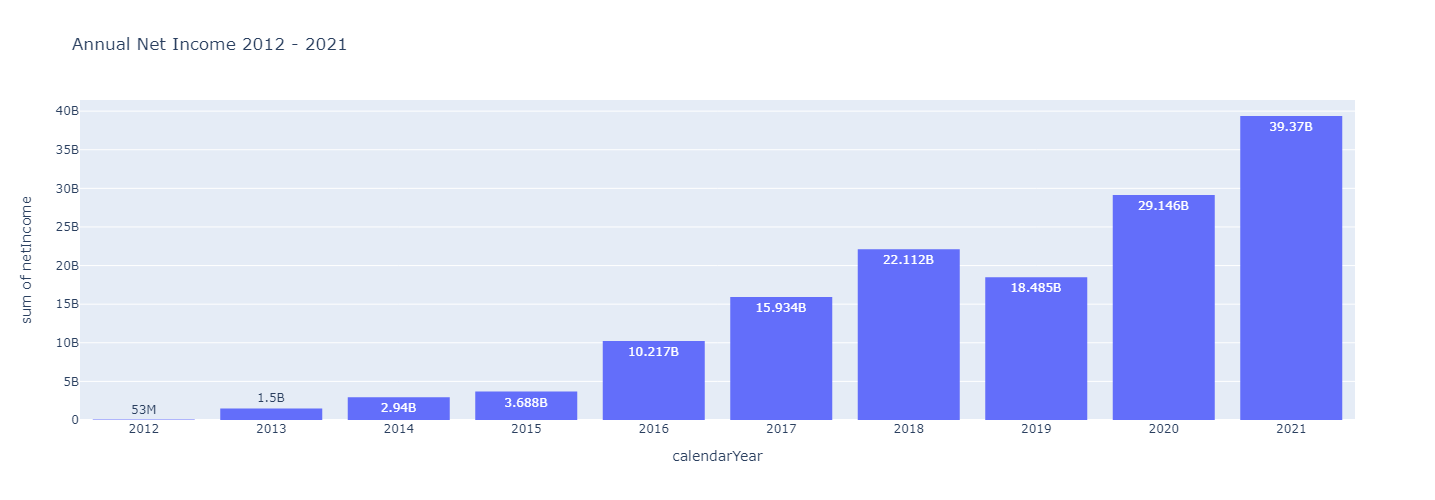

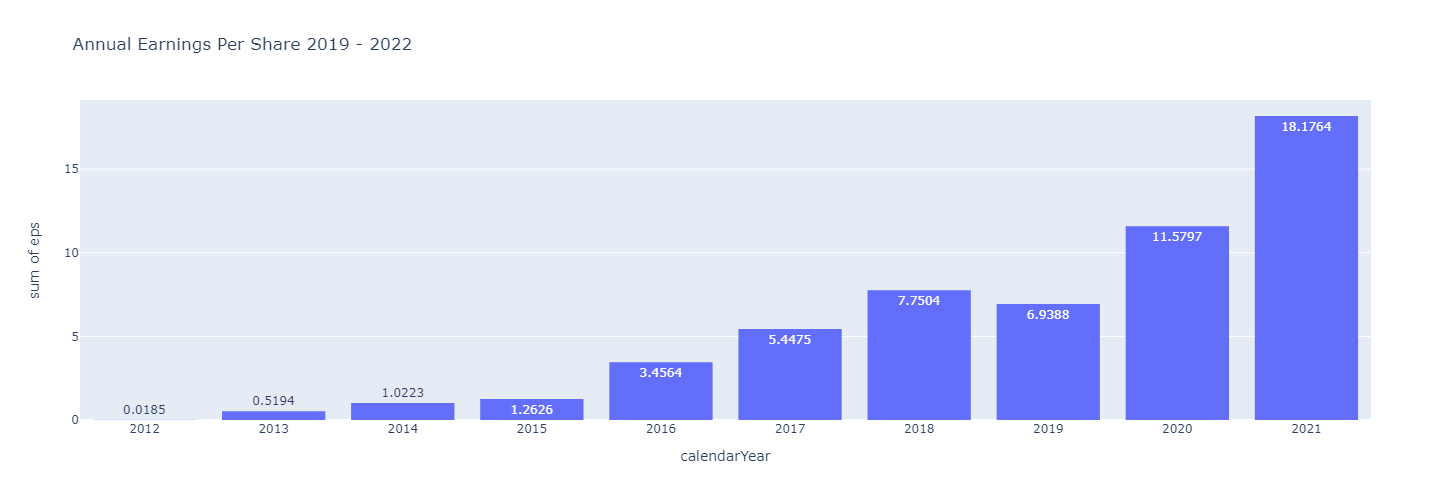

In [40]:
fig=px.histogram(net_income_df_annual, x='calendarYear', y='netIncome', title='Annual Net Income 2012 - 2021', text_auto=True, height=500)
fig.show()

## Annual EPS
fig=px.histogram(net_income_df_annual, x='calendarYear', y='eps', title='Annual Earnings Per Share 2019 - 2022', text_auto=True, height=500)
fig.show()

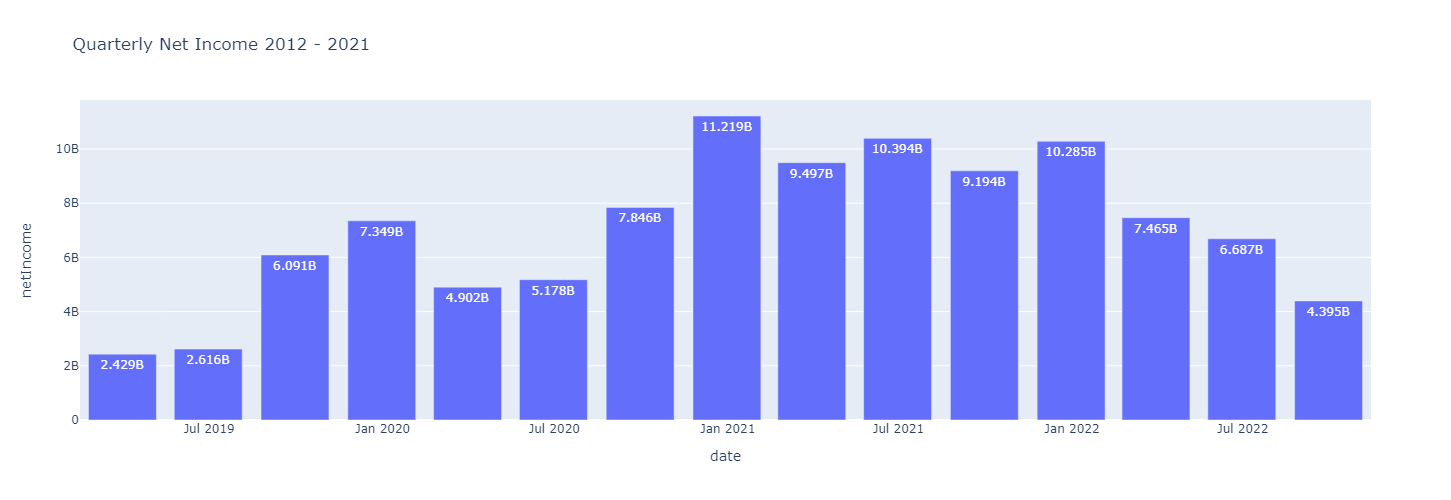

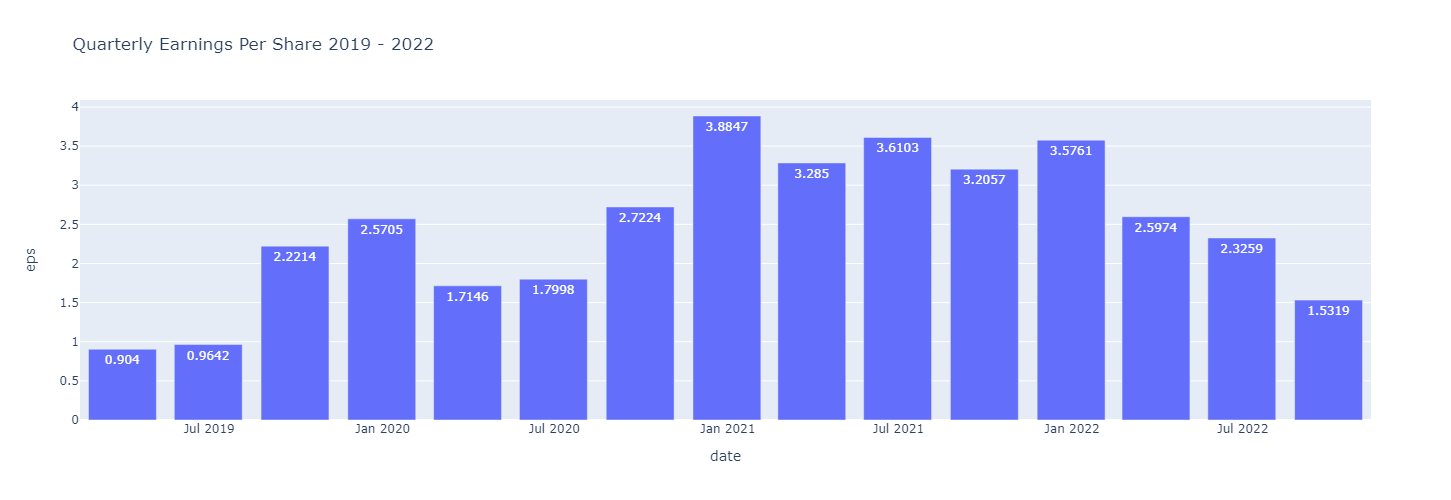

In [41]:
## Quarter Net Income
fig=px.bar(net_income_df_quarter, x='date', y='netIncome',  title='Quarterly Net Income 2012 - 2021', text_auto=True, height=500)
fig.show()

## Quarter EPS
fig=px.bar(net_income_df_quarter, x='date', y='eps', title='Quarterly Earnings Per Share 2019 - 2022', text_auto=True, height=500)
fig.show()

Quarterly EPS peaked last year in 2021 and is trending downwards. From our R&D analysis we saw that research and development expenses have started to ramp up with the development of reality labs which is a contributing factor to the EPS downturn. Other factors like increasing legal pressure on Meta's advertising arm with respect to user privacy is also potentially slowing down sales/revenue and eating away at earnings 

Still, Meta is making over $1 in profit per share of stock which has a lot of value, we will see later how that compares to it's industry peers!

## Cash Flow Statement ##
The cash flow statement is the last financial statement we are going to look at. You've probably heard of balance sheets and income statements but cash flow statements sometimes fly under the radar, but they are definitly an essential part in analyzing company value and performance. The cash flow statement shows raw data about how much cash is coming in and out of the business, without any accounting tricks(misrepreseting depreciation) that can be used to inflate net income in the income statement. 
A cash flow statement can be broken up into three main sections

1. Cash from Operating Activities
2. Cash from Investing Acitivities
3. Cash from Financing Activites

We'll analyze each section on a quartely basis to see how each section is impacted in the past 15 quarters

### Operating Activities ###
Starting off with Operating activites 

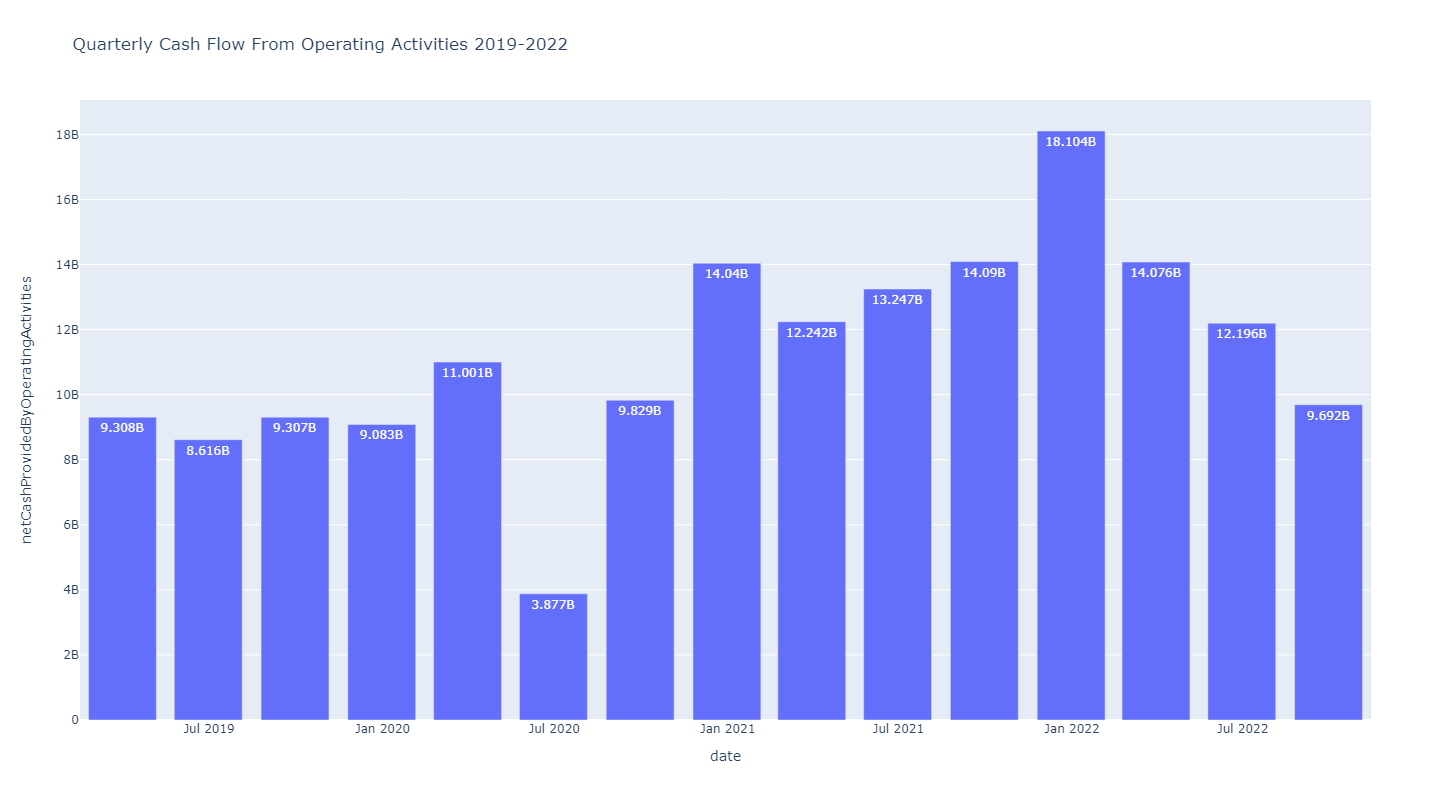

In [42]:
cash_flow_df_quarter = pd.DataFrame(cash_statement_quarter)
cash_operating_df = cash_flow_df_quarter[['date', 'netCashProvidedByOperatingActivities']]
fig = px.bar(cash_operating_df, x='date', y='netCashProvidedByOperatingActivities', text_auto=True, height=800, title='Quarterly Cash Flow From Operating Activities 2019-2022')
fig.show()

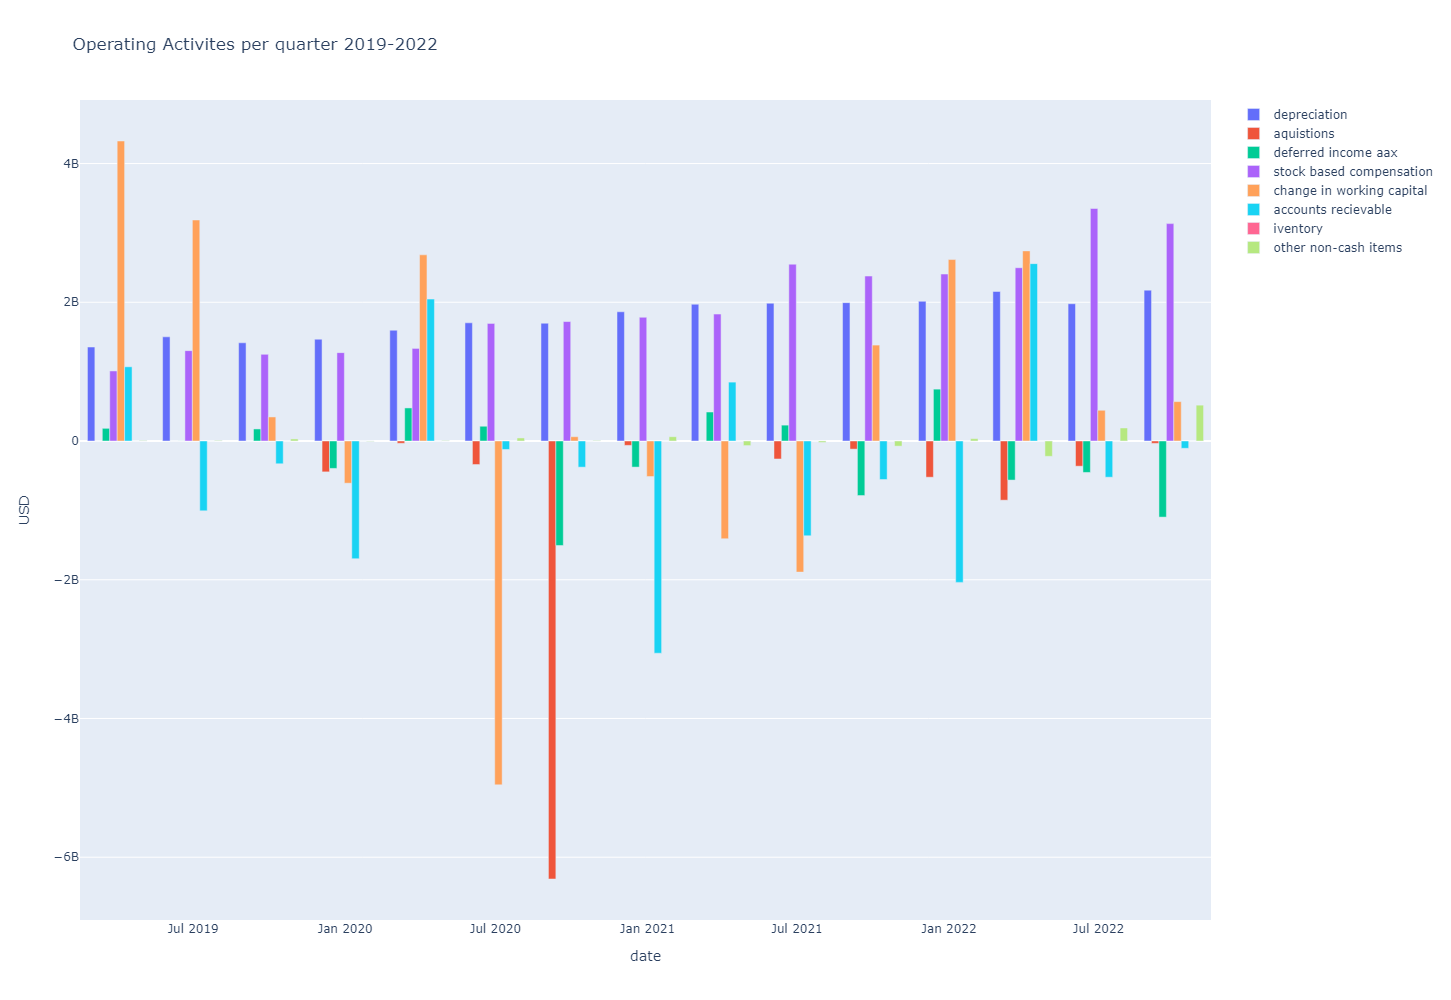

date         dep           acq           dfi         sbc  \
0   2019-03-31  1355000000  0.000000e+00  1.830000e+08  1010000000   
1   2019-06-30  1502000000  0.000000e+00  1.000000e+06  1303000000   
2   2019-09-30  1416000000  0.000000e+00  1.740000e+08  1249000000   
3   2019-12-31  1468000000 -4.450000e+08 -3.950000e+08  1274000000   
4   2020-03-31  1597000000 -3.300000e+07  4.770000e+08  1335000000   
5   2020-06-30  1704000000 -3.390000e+08  2.130000e+08  1695000000   
6   2020-09-30  1698000000 -6.314000e+09 -1.506000e+09  1722000000   
7   2020-12-31  1863000000 -6.300000e+07 -3.760000e+08  1784000000   
8   2021-03-31  1972000000  0.000000e+00  4.180000e+08  1830000000   
9   2021-06-30  1986000000 -2.590000e+08  2.290000e+08  2549000000   
10  2021-09-30  1995000000 -1.170000e+08 -7.860000e+08  2378000000   
11  2021-12-31  2014000000 -5.220000e+08  7.480000e+08  2407000000   
12  2022-03-31  2156000000 -8.530000e+08 -5.630000e+08  2498000000   
13  2022-06-30  1979000000 -3.630000e+08 -4.530000e+08  3352000000   
14  2022-09-30  2175000000 -3.400000e+07 -1.097000e+09  3134000000   

           cic          ac    i           ap          nci  
0   4325000000  1070000000  0.0  -96000000.0    6000000.0  
1   3186000000 -1006000000  0.0    9000000.0    8000000.0  
2    347000000  -328000000  0.0   89000000.0   30000000.0  
3   -608000000 -1697000000  0.0  111000000.0   -5000000.0  
4   2684000000  2046000000  0.0  -44000000.0    6000000.0  
5  -4957000000  -122000000  0.0  -56000000.0   44000000.0  
6     62000000  -377000000  0.0  139000000.0    7000000.0  
7   -512000000 -3059000000  0.0  -56000000.0   62000000.0  
8  -1409000000   849000000  0.0 -250000000.0  -66000000.0  
9  -1890000000 -1366000000  0.0  116000000.0  -21000000.0  
10  1383000000  -555000000  0.0  694000000.0  -74000000.0  
11  2616000000 -2038000000  0.0  876000000.0   34000000.0  
12  2741000000  2557000000  0.0 -882000000.0 -221000000.0  
13   443000000  -522000000  0.0  237000000.0  188000000.0  
14   568000000  -105000000  0.0  -21000000.0  517000000.0

In [46]:
cash_investing_df = cash_flow_df_quarter[['date', 'depreciationAndAmortization', 'acquisitionsNet', 'deferredIncomeTax', 'stockBasedCompensation', 'changeInWorkingCapital', 'accountsReceivables', 'inventory', 'accountsPayables','otherNonCashItems']]
cash_investing_df.columns = ['date', 'dep', 'acq', 'dfi', 'sbc', 'cic', 'ac', 'i', 'ap', 'nci']

## make layout
layout = go.Layout(
    autosize=False,
    width=1400,
    height=1000,
    )
    
fig = go.Figure(data=[
    go.Bar(name='depreciation', x=cash_investing_df['date'], y=cash_investing_df['dep']),
    go.Bar(name='aquistions', x=cash_investing_df['date'], y=cash_investing_df['acq']),
    go.Bar(name='deferred income aax', x=cash_investing_df['date'], y=cash_investing_df['dfi']),
    go.Bar(name='stock based compensation', x=cash_investing_df['date'], y=cash_investing_df['sbc']),
    go.Bar(name='change in working capital', x=cash_investing_df['date'], y=cash_investing_df['cic']),
    go.Bar(name='accounts recievable', x=cash_investing_df['date'], y=cash_investing_df['ac']),
    go.Bar(name='iventory', x=cash_investing_df['date'], y=cash_investing_df['i']),
    go.Bar(name='other non-cash items', x=cash_investing_df['date'], y=cash_investing_df['nci'])
], layout=layout)

fig.update_layout(
    title='Operating Activites per quarter 2019-2022', yaxis_title='USD', xaxis_title='date'
    )
fig.show()
cash_investing_df

Meta's cash from operating activites have fluctuated over the past 3 years quarter to quarter but generally have increased in the 4th quarter. Right now cash from operating activities is trending downwards and is almost the same with 2019. There was a rapid recovery from Covid shutdowns in 2020 but last quarters cash flow is around 50% of what it was last year Q4

### Investing Activites ###
Investing activites included on the cash flow statement reflect how Meta is spending cash on **Plant Property and Equipment (PPE), Acquistions, Purchase and Sales of Investments** Usually cash flow from investing activites should be negative because this number represents **cash outflows** aka cash that Meta is spending in invest in it's business or other businesses. 

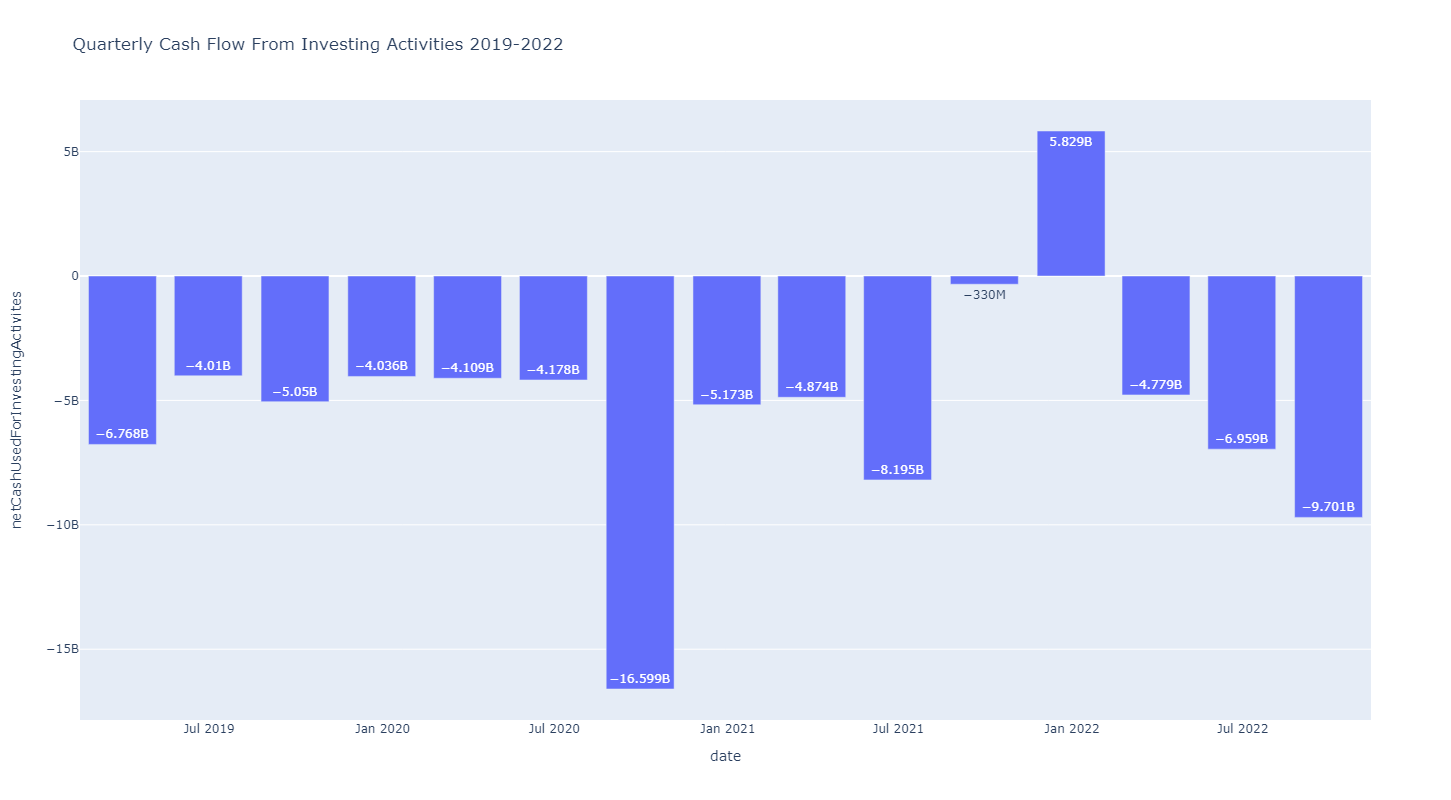

In [44]:
cash_investing_df = cash_flow_df_quarter[['date', 'netCashUsedForInvestingActivites']]
fig = px.bar(cash_investing_df, x='date', y='netCashUsedForInvestingActivites', height=800, text_auto=True, title='Quarterly Cash Flow From Investing Activities 2019-2022')
fig.show()

I'm actually really suprised to see that Meta actually has a positive cash flow from investing activites in Q4 of 2021 so let's do some deeper analysis into why that's the case!

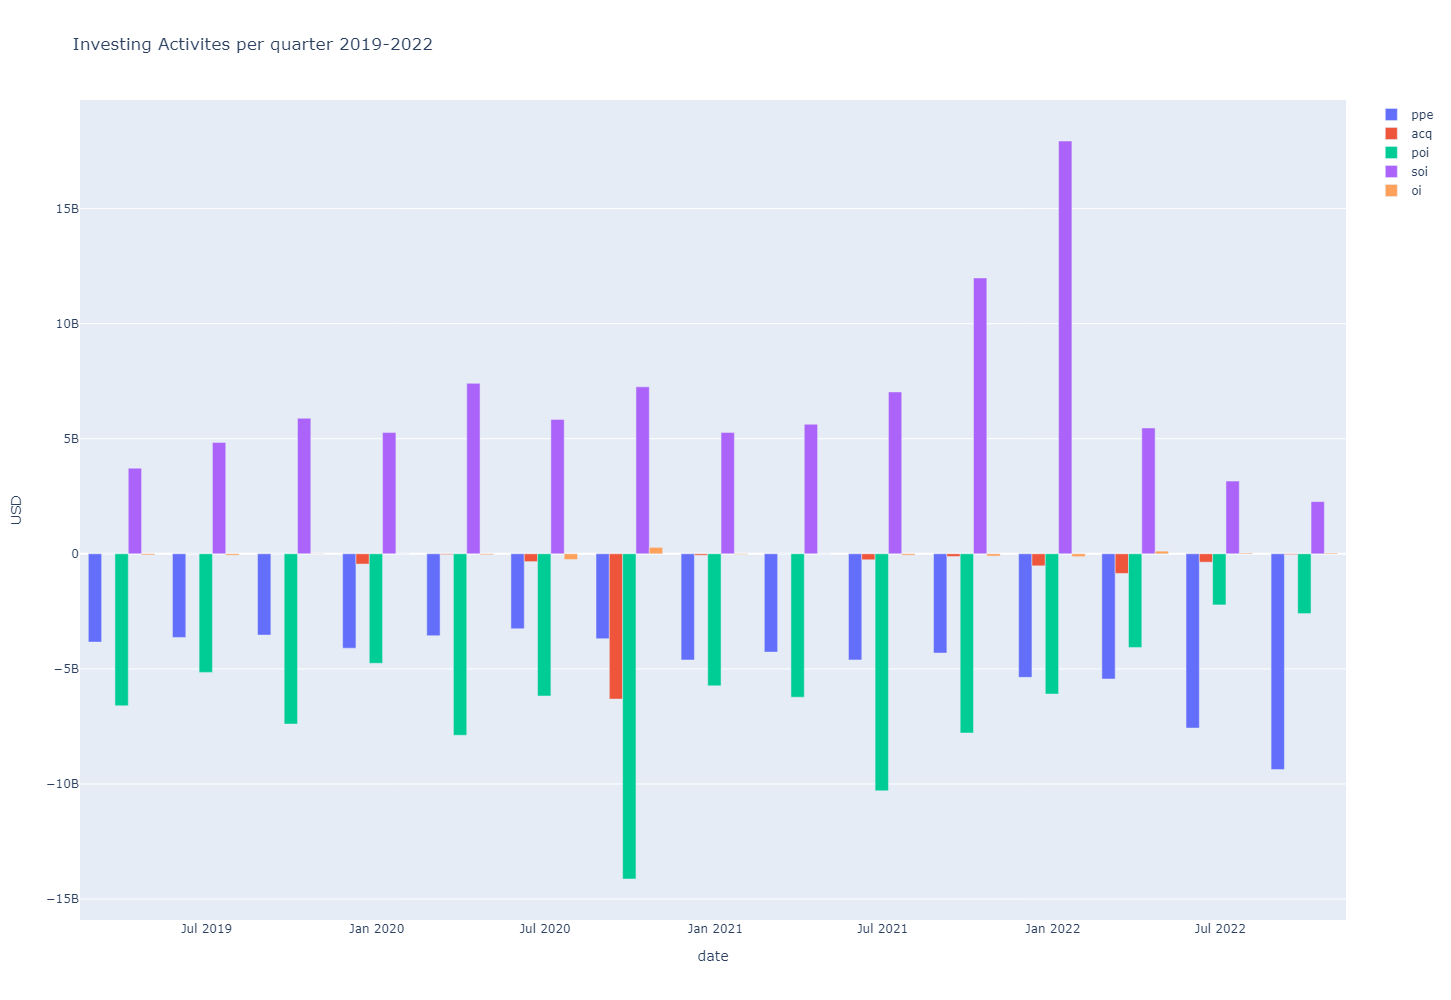

date         ppe           acq          poi          soi  \
0   2019-03-31 -3837000000  0.000000e+00  -6603000000   3722000000   
1   2019-06-30 -3633000000  0.000000e+00  -5152000000   4839000000   
2   2019-09-30 -3532000000  0.000000e+00  -7397000000   5889000000   
3   2019-12-31 -4100000000 -4.450000e+08  -4758000000   5267000000   
4   2020-03-31 -3558000000 -3.300000e+07  -7884000000   7408000000   
5   2020-06-30 -3255000000 -3.390000e+08  -6179000000   5841000000   
6   2020-09-30 -3689000000 -6.314000e+09 -14130000000   7255000000   
7   2020-12-31 -4613000000 -6.300000e+07  -5737000000   5267000000   
8   2021-03-31 -4272000000  0.000000e+00  -6231000000   5631000000   
9   2021-06-30 -4612000000 -2.590000e+08 -10297000000   7033000000   
10  2021-09-30 -4314000000 -1.170000e+08  -7786000000  11985000000   
11  2021-12-31 -5369000000 -5.220000e+08  -6093000000  17937000000   
12  2022-03-31 -5441000000 -8.530000e+08  -4068000000   5467000000   
13  2022-06-30 -7572000000 -3.630000e+08  -2220000000   3159000000   
14  2022-09-30 -9375000000 -3.400000e+07  -2597000000   2269000000   

             oi      netcash  
0   -50000000.0  -6768000000  
1   -64000000.0  -4010000000  
2   -10000000.0  -5050000000  
3           0.0  -4036000000  
4   -42000000.0  -4109000000  
5  -246000000.0  -4178000000  
6   279000000.0 -16599000000  
7   -27000000.0  -5173000000  
8    -2000000.0  -4874000000  
9   -60000000.0  -8195000000  
10  -98000000.0   -330000000  
11 -124000000.0   5829000000  
12  116000000.0  -4779000000  
13   37000000.0  -6959000000  
14   36000000.0  -9701000000

In [47]:
cash_investing_df = cash_flow_df_quarter[['date', 'investmentsInPropertyPlantAndEquipment', 'acquisitionsNet', 'purchasesOfInvestments', 'salesMaturitiesOfInvestments', 'otherInvestingActivites', 'netCashUsedForInvestingActivites']]
cash_investing_df.columns = ['date', 'ppe', 'acq', 'poi', 'soi', 'oi', 'netcash']

## make layout
layout = go.Layout(
    autosize=False,
    width=1400,
    height=1000,
    )
    
fig = go.Figure(data=[
    go.Bar(name='ppe', x=cash_investing_df['date'], y=cash_investing_df['ppe']),
    go.Bar(name='acq', x=cash_investing_df['date'], y=cash_investing_df['acq']),
    go.Bar(name='poi', x=cash_investing_df['date'], y=cash_investing_df['poi']),
    go.Bar(name='soi', x=cash_investing_df['date'], y=cash_investing_df['soi']),
    go.Bar(name='oi', x=cash_investing_df['date'], y=cash_investing_df['oi']),
], layout=layout)

fig.update_layout(
    title='Investing Activites per quarter 2019-2022', yaxis_title='USD', xaxis_title='date'
    )
fig.show()
cash_investing_df

Ok so it seems like in Q4 of 2021 Meta had sold a bunch of investments it owned which was overwhelmingly greater than how much Meta spent of making new investemnts. From this graph we can see that most of the investing activites usually involve purchasing and selling some sort of investment. There is also a growing trend in how much Meta is spending on **PPE** which is likely infrastructure for Reality Labs

### Financing Activities ###
The last section of the cash flow statement we are going to analyze is the cash from financing activites. Financing activites revolve around how Meta is able to raise capital whether through equity or debt. Some activites we care about are **debt repayments, common stock issues and repurchases, and dividends paid**

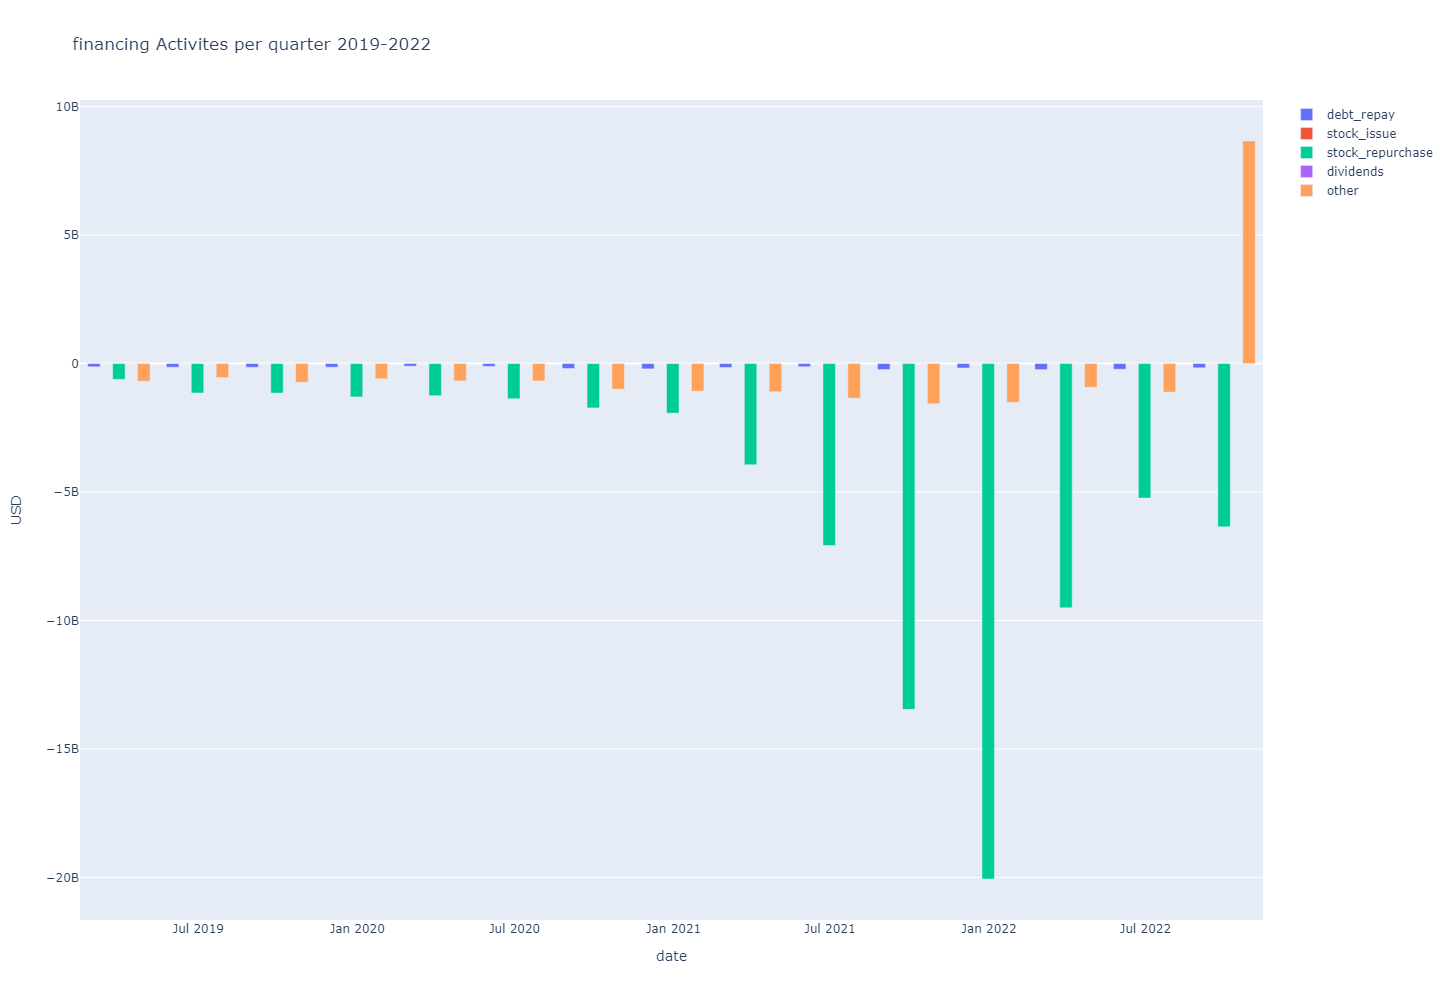

In [51]:
cash_financing_df = cash_flow_df_quarter[['date', 'debtRepayment', 'commonStockIssued', 'commonStockRepurchased', 'dividendsPaid', 'otherFinancingActivites', 'netCashUsedProvidedByFinancingActivities']]
cash_financing_df.columns = ['date', 'debt_repay', 'stock_issue', 'stock_repurchase', 'dividends', 'other', 'netCash']

## make layout
layout = go.Layout(
    autosize=False,
    width=1400,
    height=1000,
    )
    
fig = go.Figure(data=[
    go.Bar(name='debt_repay', x=cash_financing_df['date'], y=cash_financing_df['debt_repay']),
    go.Bar(name='stock_issue', x=cash_financing_df['date'], y=cash_financing_df['stock_issue']),
    go.Bar(name='stock_repurchase', x=cash_financing_df['date'], y=cash_financing_df['stock_repurchase']),
    go.Bar(name='dividends', x=cash_financing_df['date'], y=cash_financing_df['dividends']),
    go.Bar(name='other', x=cash_financing_df['date'], y=cash_financing_df['other']),
], layout=layout)

fig.update_layout(
    title='financing Activites per quarter 2019-2022', yaxis_title='USD', xaxis_title='date'
    )
fig.show()

Meta has actually never paid out a dividend yet but chooses to reinvest it's earnings back into the company, fueling business growth. We should note that Meta currently has had very little debt obligation in the past 3 years and has raised capital through issuing stock either. In fact, Meta has actively been buying back shares in the past year which could signal that Meta believes it's stock is currently undervalued and can increase the share value for existing shareholders by limiting the supply of oustanding shares. But we should be careful because financial ratios like earning per share is affected by the decrease in oustanding shares, because there are less shares outstanding, earnings per share inflates

### Free Cash Flow ###
One final thing we are going to look at is **Free Cash Flow**. This is the cash a company generates after taking into consideration the cash outflows that support its opeartions and maintain its capital assets. This is just the cash left over after a company pays for its operating expenses and capital expenditures. **Free cash flow** can be used for whatever Meta wants whether its making new investments or just keeping it in a bank

$$FreeCashFlow = Operating Cash Flow - Capital Expenditures $$

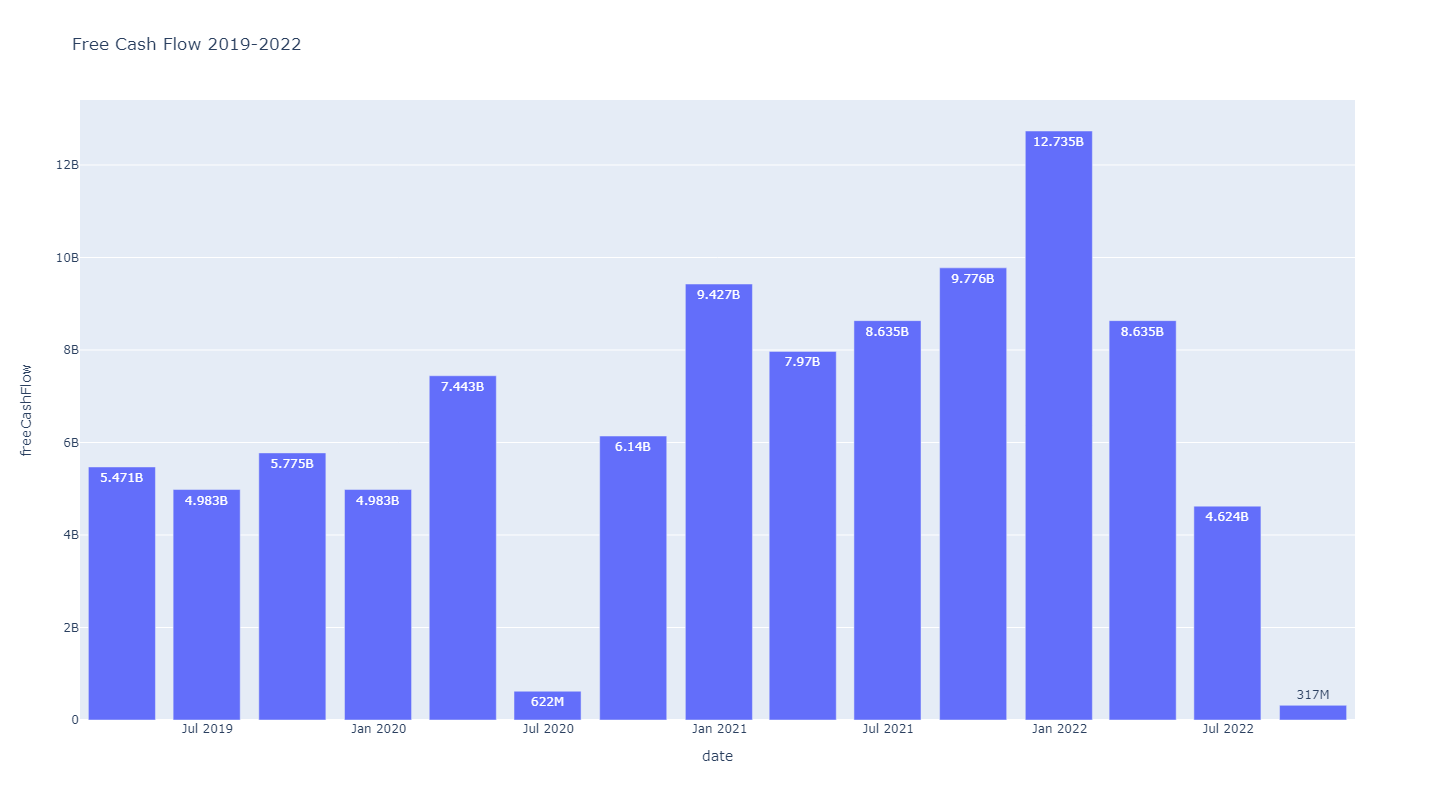

In [52]:
free_cash_flow_df = pd.DataFrame(cash_flow_df_quarter[['date', 'freeCashFlow']])
fig = px.bar(free_cash_flow_df, x='date', y='freeCashFlow', text_auto = True, title='Free Cash Flow 2019-2022', height=800)
fig.show()

Ever since Q4 of 2021 **Free Cash Flow** has deteriorated to the lowest it's been in the past 3 years on a quarterly basis. We should take a closer look as to why this is happening and what is affecting this trend. Let's take a look at capital expenditures to see if we can gain any information

### Capital Expenditures ###
Capital Expenditures are long term expenses/purchases like real estate development, acquistion of a competitor/supplier, upgrades to technologu and so on. 

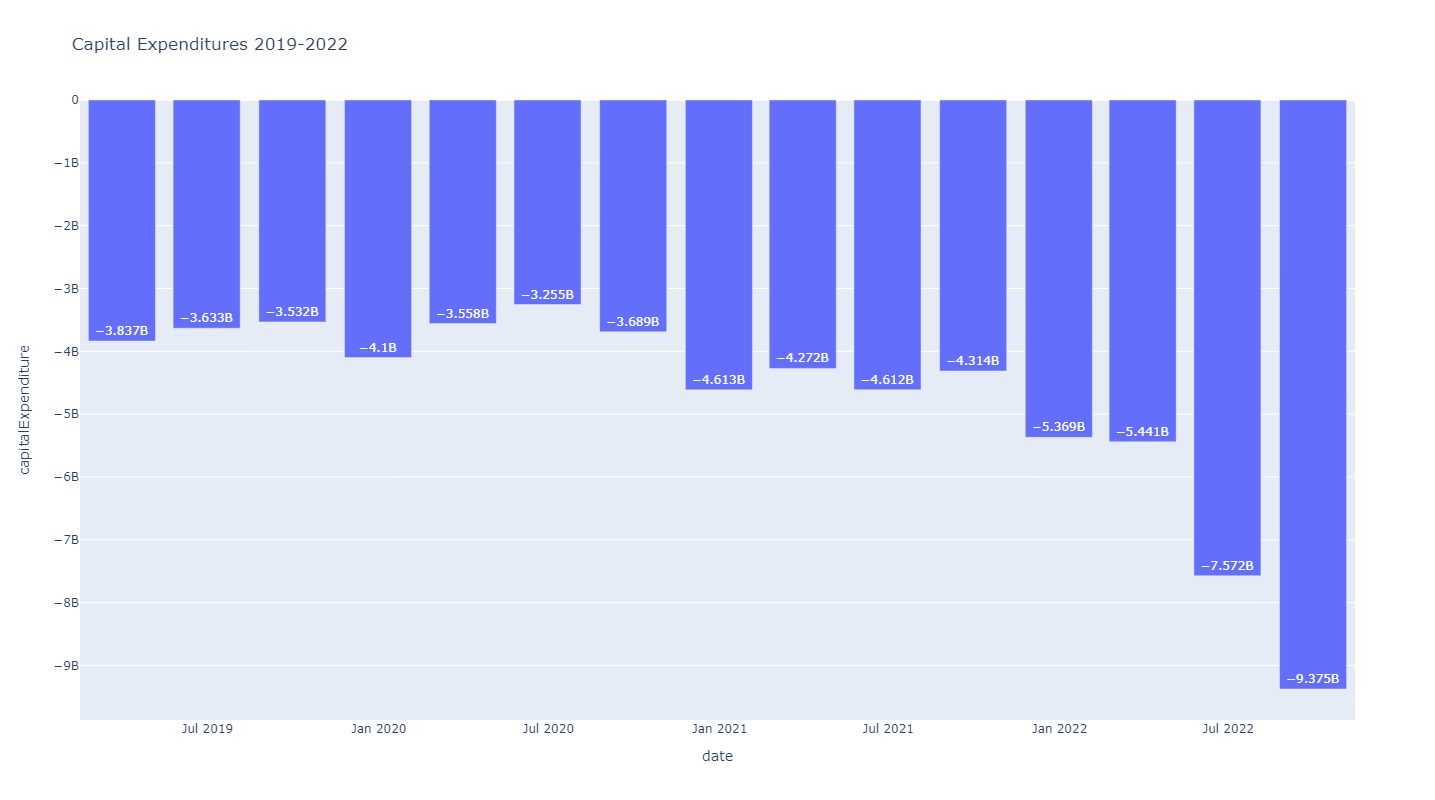

In [53]:
capex_df = pd.DataFrame(cash_flow_df_quarter[['date','capitalExpenditure']])
fig = px.bar(capex_df, x='date', y='capitalExpenditure', text_auto = True, title='Capital Expenditures 2019-2022', height=800)
fig.show()

Ok this is starting to be more clear, Meta has dramatically increased it's capital expenditures within the last 2 quarters which is eating away at Free Cash Flow. This is likely due to it's Reality Labs expansion, where Meta is currently investing a lot of it's resources to build the infrastructure and systems to support their vision of a metaverse

## Checkpoint ##
Lets GoooooooOooo!!! We've reached the end of our financial statement analysis :D There were a lot of ratios and metrics we kept track of so let's recap them:

1. Balance Sheet
    - book value
    - price to book ratio
    - debt to equity ratio
2. Income Statement
    - revenue
    - gross profit
    - research and development expense
    - EBITDA
    - net income
    - earnings per share
3. Cash Flow Statement
    - operating activities
    - investing activities
    - financing activities 
    - free cash flow
    
We've analyzed these metrics over the course of 10 year periods and 3 year quarterly periods to see the change over time within Meta's financial statements. Our analysis is currently very 1-dimensional in that we are only comparing these Metrics with Meta's past performance. In the next section we will look at how Meta is performing compared to its competitors and the tech industry as a whole


## Industry Analysis ##
We'll start our analysis by the **Price to Earnings Ratio (PE Ratio)** of Meta to the entire technology industry. The **Price to Earnings Ratio** measures the current share price relative to the companies earnings per share. A company with a high PE ratio could mean that the company is overvalued, or investors are expecting a lot of growth in the future. A company with low PE ratio could mean that the company is undervalued, or investors are expecting little growth in the future. 

$$PriceToEarningsRatio = \frac {MarketValuePerShare}{EarningsPerShare} $$

In [54]:
## get competitor data
qkmeta = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/key-metrics/META?period=quarter&limit=40&apikey={APIKEY}")
qknetflix = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/key-metrics/NFLX?period=quarter&limit=40&apikey={APIKEY}")
qkamazon = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/key-metrics/AMZN?period=quarter&limit=40&apikey={APIKEY}")
qksnapchat = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/key-metrics/SNAP?period=quarter&limit=40&apikey={APIKEY}")
qkpinterest = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/key-metrics/PINS?period=quarter&limit=40&apikey={APIKEY}")
qkmicrosoft = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/key-metrics/MSFT?period=quarter&limit=40&apikey={APIKEY}")
qkalphabet = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/key-metrics/GOOGL?period=quarter&limit=40&apikey={APIKEY}")

qmeta = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/ratios/META?period=quarter&limit=40&apikey={APIKEY}")
qnetflix = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/ratios/NFLX?period=quarter&limit=40&apikey={APIKEY}")
qamazon = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/ratios/AMZN?period=quarter&limit=40&apikey={APIKEY}")
qsnapchat = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/ratios/SNAP?period=quarter&limit=40&apikey={APIKEY}")
qpinterest = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/ratios/PINS?period=quarter&limit=40&apikey={APIKEY}")
qmicrosoft = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/ratios/MSFT?period=quarter&limit=40&apikey={APIKEY}")
qalphabet = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/ratios/GOOGL?period=quarter&limit=40&apikey={APIKEY}")

In [55]:
## stick everything in dataframe
qmeta_df = pd.DataFrame(qmeta)
qnetflix_df = pd.DataFrame(qnetflix)
qamazon_df = pd.DataFrame(qamazon)
qsnapchat_df = pd.DataFrame(qsnapchat)
qpinterest_df = pd.DataFrame(qpinterest)
qmicrosoft_df = pd.DataFrame(qmicrosoft)
qalphabet_df = pd.DataFrame(qalphabet)

qkmeta_df = pd.DataFrame(qkmeta)
qknetflix_df = pd.DataFrame(qknetflix)
qkamazon_df = pd.DataFrame(qkamazon)
qksnapchat_df = pd.DataFrame(qksnapchat)
qkpinterest_df = pd.DataFrame(qkpinterest)
qkmicrosoft_df = pd.DataFrame(qkmicrosoft)
qkalphabet_df = pd.DataFrame(qkalphabet)


### Revenue Per Share ###
Amongst it's competitors meta is currently outperforming companies like alphabet, microsoft, snapchat, and pinterest when looking at Revenue Per Share. In 2022, all of these companies have experienced a slowdown in revenue per share growth and some even have declining ratios indicating a broad industry slowdown

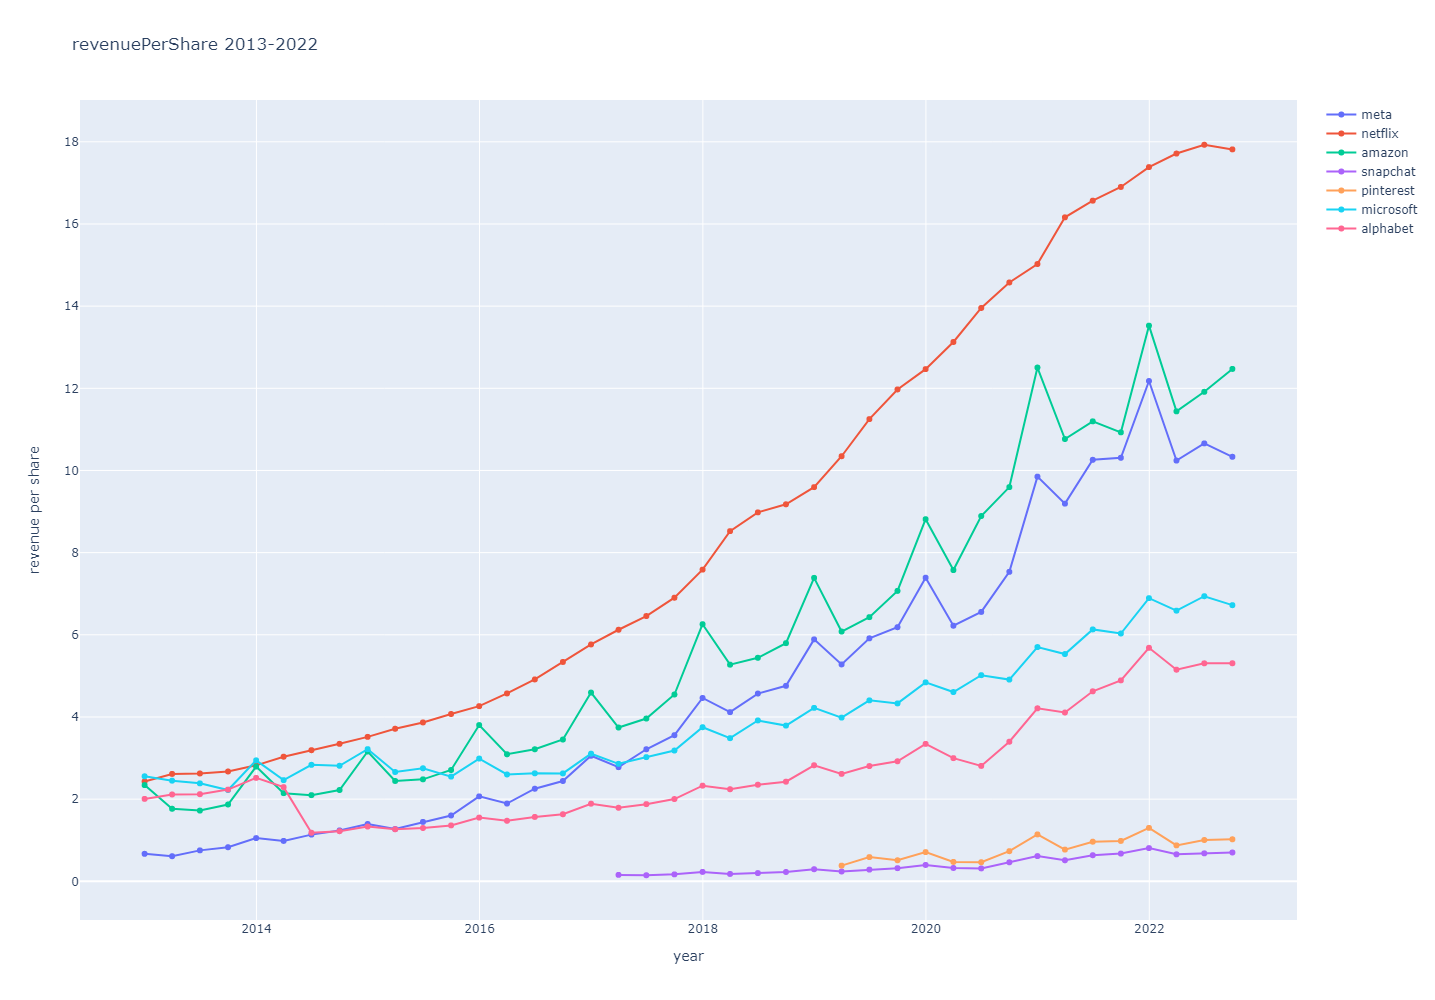

In [62]:
## Revenue Per Share
fig = go.Figure(data=[
    go.Scatter(name='meta', x=qkmeta_df['date'], y=qkmeta_df['revenuePerShare'], mode='lines+markers'),
    go.Scatter(name='netflix', x=qknetflix_df['date'], y=qknetflix_df['revenuePerShare'], mode='lines+markers'),
    go.Scatter(name='amazon', x=qkamazon_df['date'], y=qkamazon_df['revenuePerShare'], mode='lines+markers'),
    go.Scatter(name='snapchat', x=qksnapchat_df['date'], y=qksnapchat_df['revenuePerShare'], mode='lines+markers'),
    go.Scatter(name='pinterest', x=qkpinterest_df['date'], y=qkpinterest_df['revenuePerShare'], mode='lines+markers'),
    go.Scatter(name='microsoft', x=qkmicrosoft_df['date'], y=qkmicrosoft_df['revenuePerShare'], mode='lines+markers'),
    go.Scatter(name='alphabet', x=qkalphabet_df['date'], y=qkalphabet_df['revenuePerShare'], mode='lines+markers')
    ],layout=layout)

fig.update_layout(
    title='revenuePerShare 2013-2022', yaxis_title='revenue per share', xaxis_title='year'
)
fig.show()

### Earnings Per Share ###

Historically Meta has had higher earnings per share than the competitors listed in the graph. However as of 2022, EPS has been tanking and fallen more than 50% since the start of 2022. This decline in earnings per share justifies some of the price decline in recent times as investors are worried about future earnings potential. If this trend continues then Meta will have the same eps since last 5 years ago. We should note that Meta's eps has been very volatile in the past 5 years with rapid growth and rapid declines. 

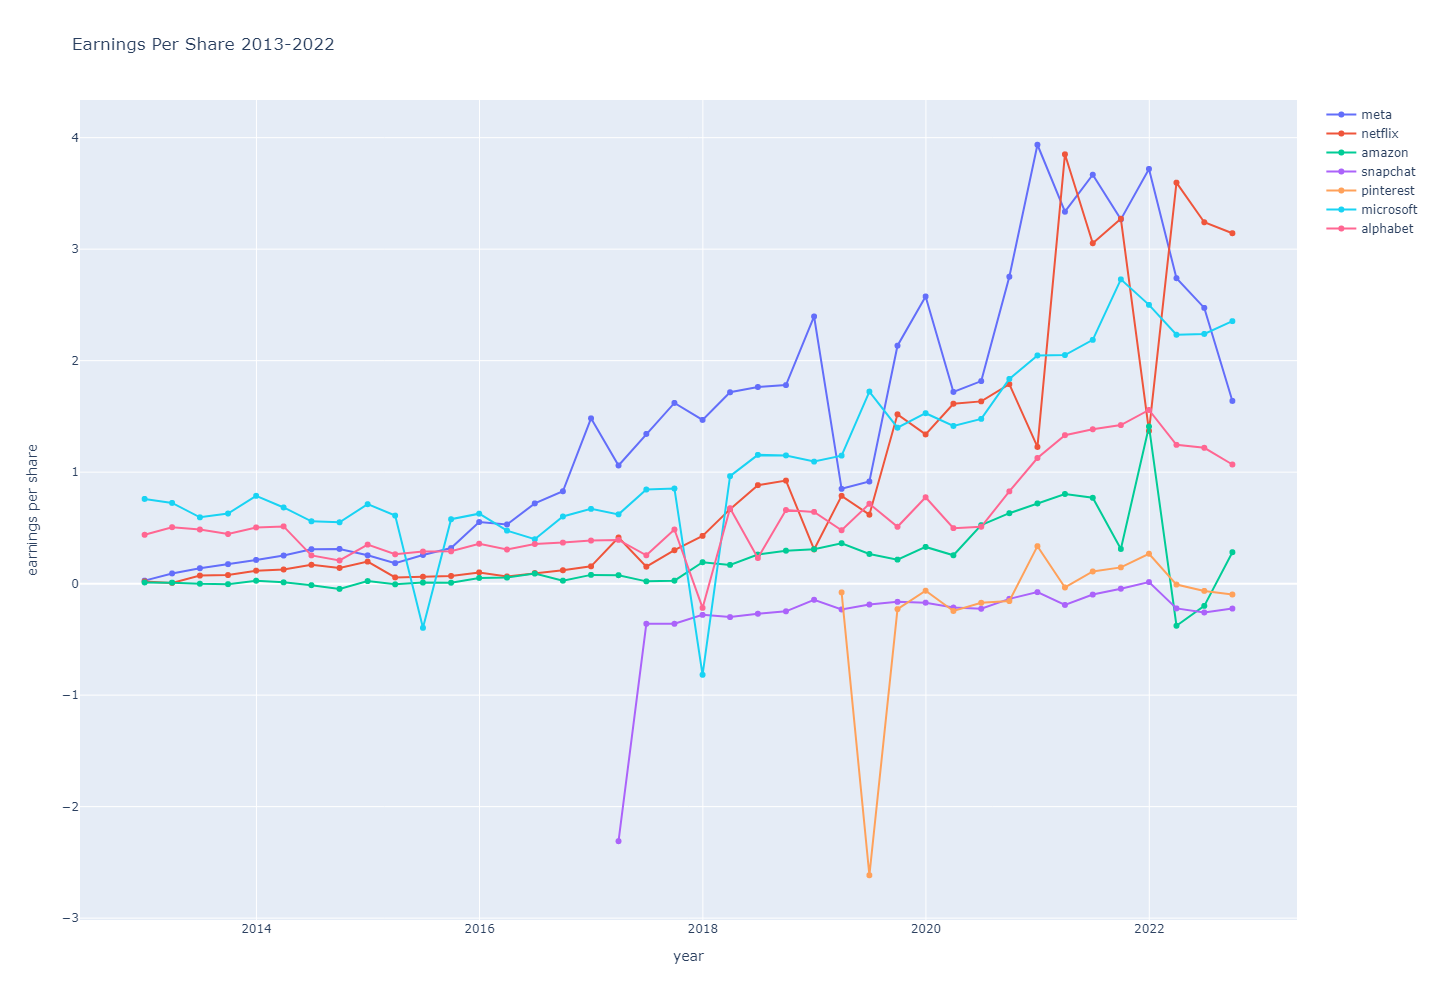

In [63]:
fig = go.Figure(data=[
    go.Scatter(name='meta', x=qkmeta_df['date'], y=qkmeta_df['netIncomePerShare'], mode='lines+markers'),
    go.Scatter(name='netflix', x=qknetflix_df['date'], y=qknetflix_df['netIncomePerShare'], mode='lines+markers'),
    go.Scatter(name='amazon', x=qkamazon_df['date'], y=qkamazon_df['netIncomePerShare'], mode='lines+markers'),
    go.Scatter(name='snapchat', x=qksnapchat_df['date'], y=qksnapchat_df['netIncomePerShare'], mode='lines+markers'),
    go.Scatter(name='pinterest', x=qkpinterest_df['date'], y=qkpinterest_df['netIncomePerShare'], mode='lines+markers'),
    go.Scatter(name='microsoft', x=qkmicrosoft_df['date'], y=qkmicrosoft_df['netIncomePerShare'], mode='lines+markers'),
    go.Scatter(name='alphabet', x=qkalphabet_df['date'], y=qkalphabet_df['netIncomePerShare'], mode='lines+markers')
    ],layout=layout)

fig.update_layout(
    title='Earnings Per Share 2013-2022', yaxis_title='earnings per share', xaxis_title='year'
)
fig.show()

### Price To Earnings Ratio ###

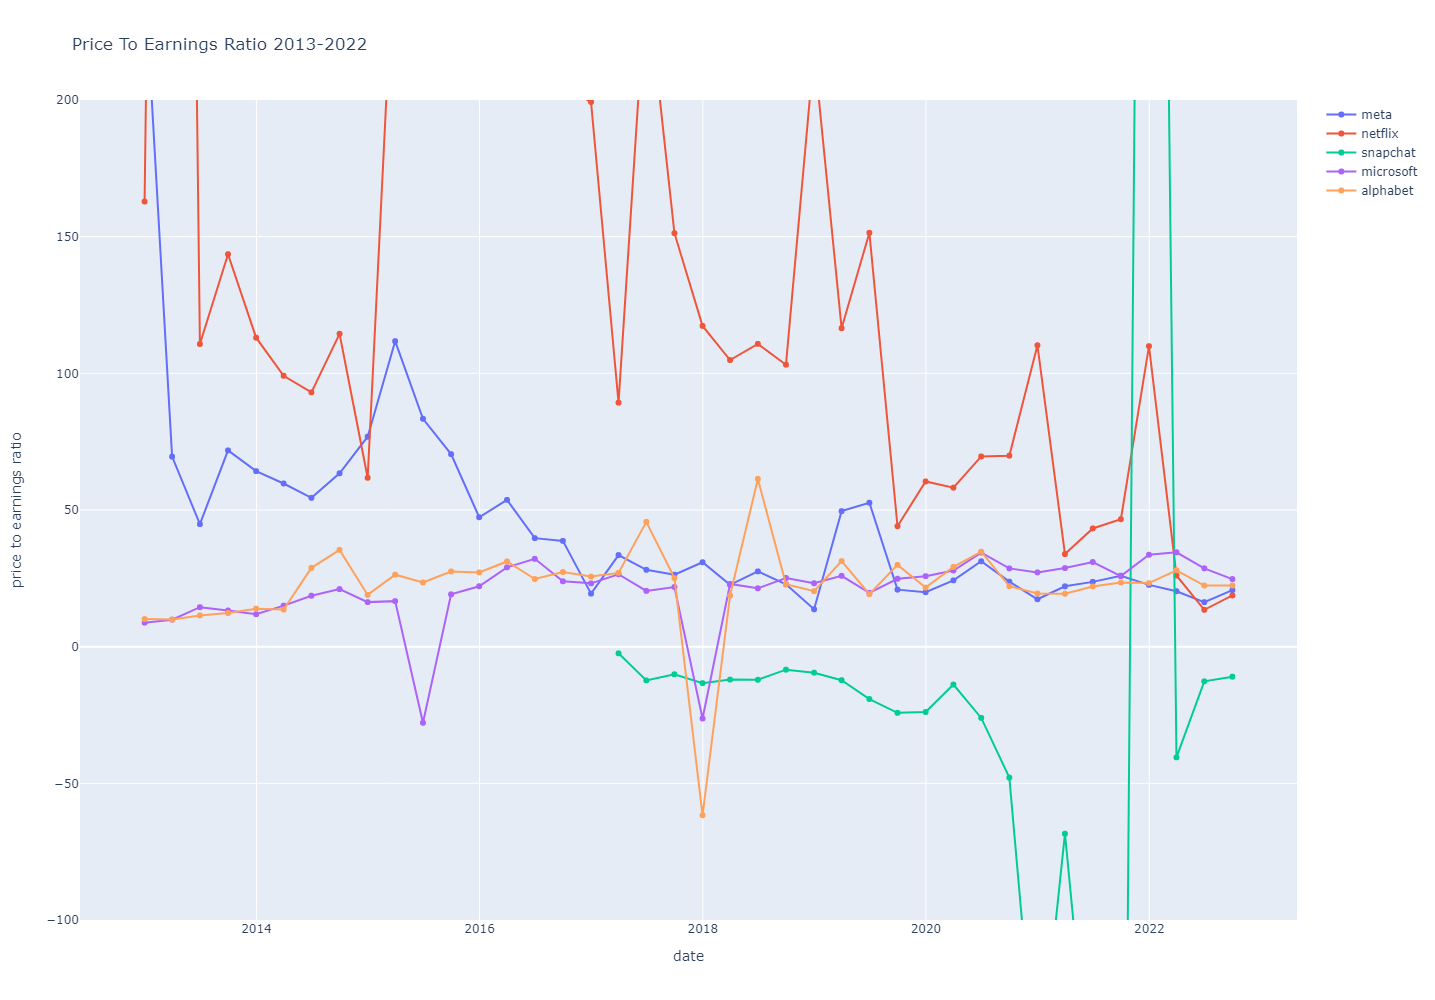

In [64]:
## price to earnings ratio 
## comented out some companies that would mess up graph
fig = go.Figure(data=[
    go.Scatter(name='meta', x=qmeta_df['date'], y=qmeta_df['priceEarningsRatio'], mode='lines+markers'),
    go.Scatter(name='netflix', x=qnetflix_df['date'], y=qnetflix_df['priceEarningsRatio'], mode='lines+markers'),
    #go.Scatter(name='amazon', x=qamazon_df['date'], y=qamazon_df['priceEarningsRatio'], mode='lines+markers'),
    go.Scatter(name='snapchat', x=qsnapchat_df['date'], y=qsnapchat_df['priceEarningsRatio'], mode='lines+markers'),
    #go.Scatter(name='pinterest', x=qpinterest_df['date'], y=qpinterest_df['priceEarningsRatio'], mode='lines+markers'),
    go.Scatter(name='microsoft', x=qmicrosoft_df['date'], y=qmicrosoft_df['priceEarningsRatio'], mode='lines+markers'),
    go.Scatter(name='alphabet', x=qalphabet_df['date'], y=qalphabet_df['priceEarningsRatio'], mode='lines+markers')
    ],layout=layout, layout_yaxis_range=[-100,200])

fig.update_layout(
    title='Price To Earnings Ratio 2013-2022', yaxis_title='price to earnings ratio', xaxis_title='date' 
)
fig.show()

The price to earnings ratio for Meta has stayed relatively consistent within the past 2 years and is starting to trend slightly upwards. Earnings per share had a pretty big decline in the most recent quarter so it makes sense that the price to earnings ratio has increased. Compared to alphabet, netflix, and microsoft, Meta has a similar price to earnings ratio. 

### Debt To Equity Ratio ###
Meta has consistently had a low debt to equity ratio compared to it's peers. It has never reched over .5 in the past 10 years which means that Meta is primarly financed by stock and retained earnigns. Only recently has Meta increased its debt obligations by around 10% which still keeps its debt to equity ratio below 50%

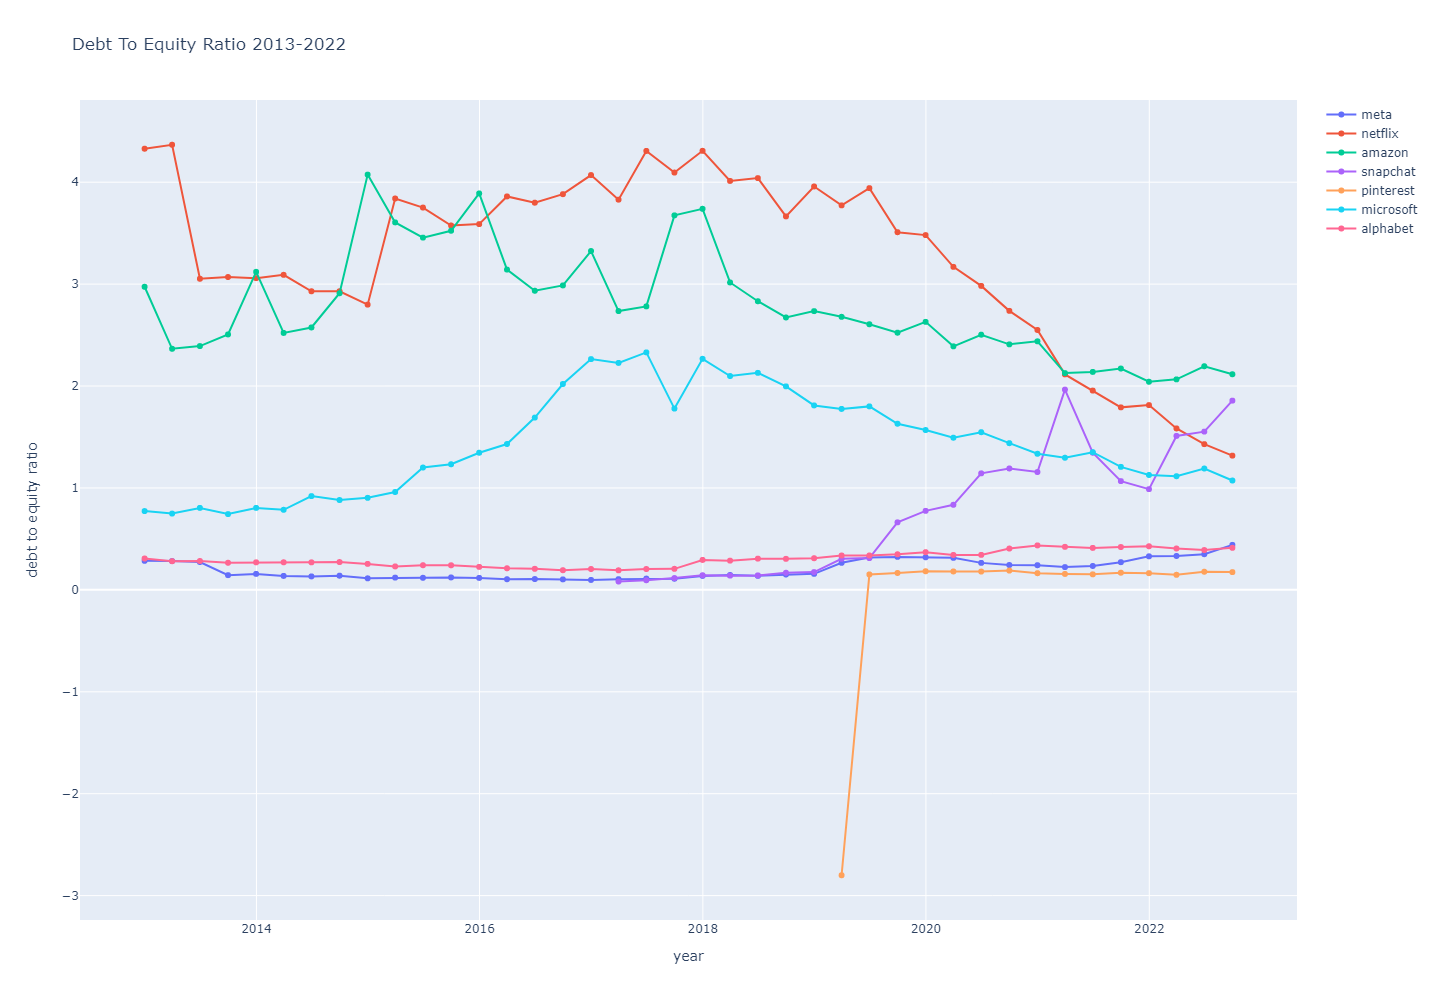

In [65]:
fig = go.Figure(data=[
    go.Scatter(name='meta', x=qmeta_df['date'], y=qmeta_df['debtEquityRatio'], mode='lines+markers'),
    go.Scatter(name='netflix', x=qnetflix_df['date'], y=qnetflix_df['debtEquityRatio'], mode='lines+markers'),
    go.Scatter(name='amazon', x=qamazon_df['date'], y=qamazon_df['debtEquityRatio'], mode='lines+markers'),
    go.Scatter(name='snapchat', x=qsnapchat_df['date'], y=qsnapchat_df['debtEquityRatio'], mode='lines+markers'),
    go.Scatter(name='pinterest', x=qpinterest_df['date'], y=qpinterest_df['debtEquityRatio'], mode='lines+markers'),
    go.Scatter(name='microsoft', x=qmicrosoft_df['date'], y=qmicrosoft_df['debtEquityRatio'], mode='lines+markers'),
    go.Scatter(name='alphabet', x=qalphabet_df['date'], y=qalphabet_df['debtEquityRatio'], mode='lines+markers')
    ],layout=layout)

fig.update_layout(
    title='Debt To Equity Ratio 2013-2022', yaxis_title='debt to equity ratio', xaxis_title='year'
)
fig.show()

### Free Cash Flow to Operating Cash Flow Ratio ###
Free Cash Flow toOperating Cash Flow determines how much free cash flow is being generated for every dollar of operating cash flow. Heres the formula:

$$Free Cash Flow To Opearting Cash Flow = \frac{FreeCashFlow}{OperatingCashFlow} $$

Generally this should be between 0 and 1, numbers closer to 1 meaning that a company is able to generate more free cash flow for every dollar of operating cash flow while a number closer to 1 means a company is generating less free cash flow for every dollar of operating cash flow. This helps us see how much



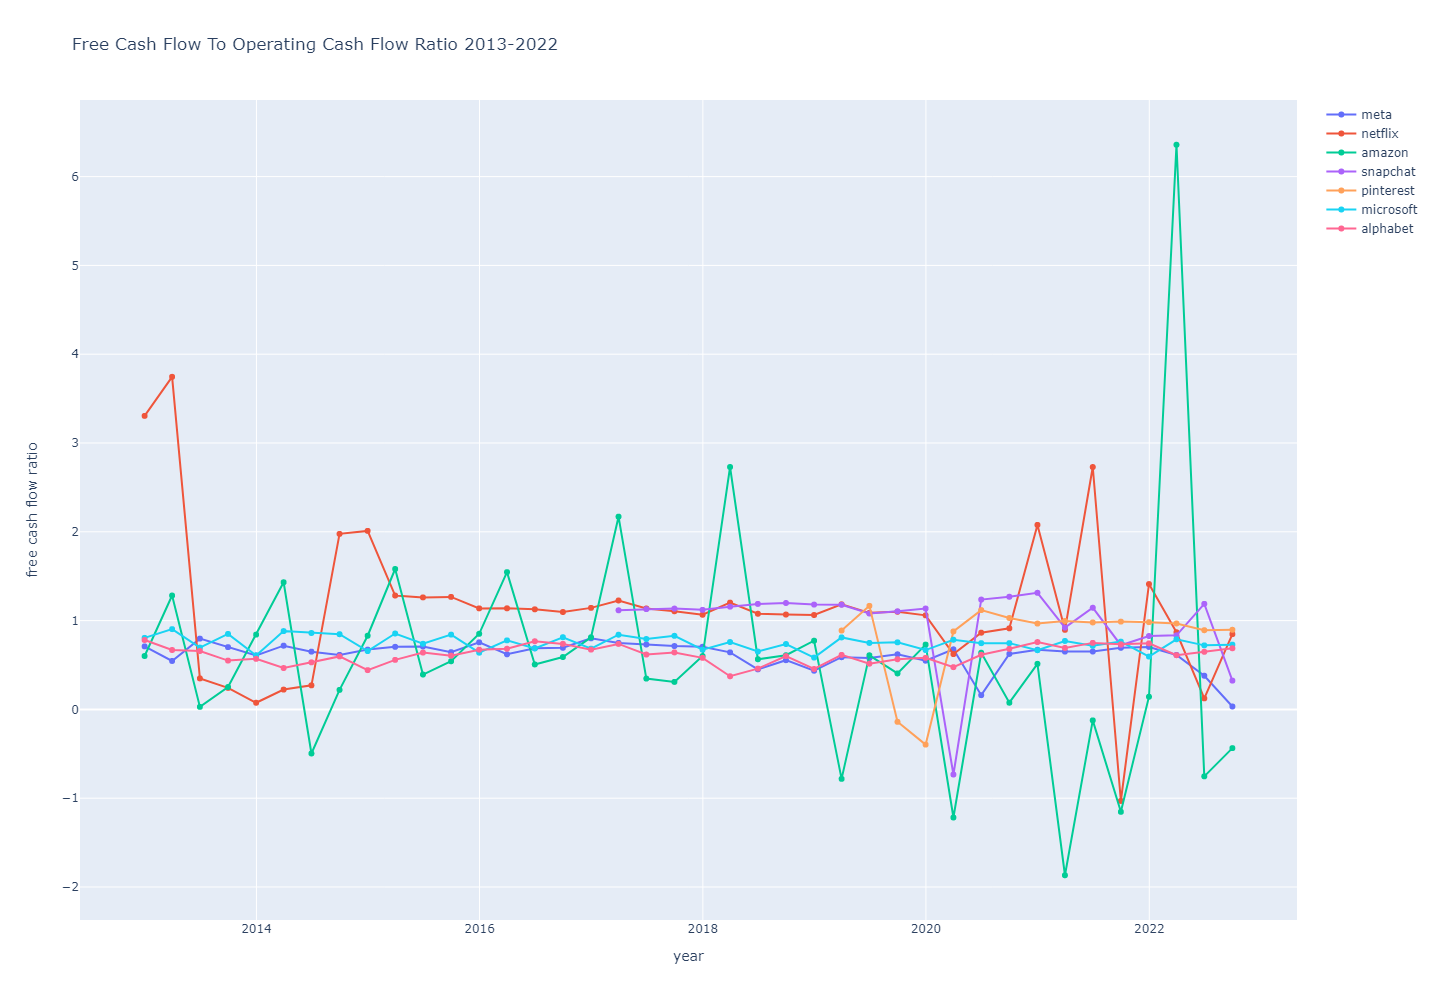

In [66]:
fig = go.Figure(data=[
    go.Scatter(name='meta', x=qmeta_df['date'], y=qmeta_df['freeCashFlowOperatingCashFlowRatio'], mode='lines+markers'),
    go.Scatter(name='netflix', x=qnetflix_df['date'], y=qnetflix_df['freeCashFlowOperatingCashFlowRatio'], mode='lines+markers'),
    go.Scatter(name='amazon', x=qamazon_df['date'], y=qamazon_df['freeCashFlowOperatingCashFlowRatio'], mode='lines+markers'),
    go.Scatter(name='snapchat', x=qsnapchat_df['date'], y=qsnapchat_df['freeCashFlowOperatingCashFlowRatio'], mode='lines+markers'),
    go.Scatter(name='pinterest', x=qpinterest_df['date'], y=qpinterest_df['freeCashFlowOperatingCashFlowRatio'], mode='lines+markers'),
    go.Scatter(name='microsoft', x=qmicrosoft_df['date'], y=qmicrosoft_df['freeCashFlowOperatingCashFlowRatio'], mode='lines+markers'),
    go.Scatter(name='alphabet', x=qalphabet_df['date'], y=qalphabet_df['freeCashFlowOperatingCashFlowRatio'], mode='lines+markers')
    ],layout=layout)

fig.update_layout(
    title='Free Cash Flow To Operating Cash Flow Ratio 2013-2022', yaxis_title='free cash flow ratio', xaxis_title='year'
)
fig.show()

## Results and Recap ##
Yuhhhh, we've reached the ending of our fundamental analysis of Meta :D We know have a basic understanding on the fundamentals of Meta by looking at it's financial statements and comparing performance ratios with other Meta's top competitors. Let's recap our findings below:

1. Low Debt to Equity Ratio: Having a low debt to equity ratio protects our investment from any debt obligations that can eat away at Meta's earnings and cashflow. We should note that as Meta grows it's Reality Labs business segment it might leverage more debt to fuel it's expansion, but we should be cautious as to how much debt Meta actually uses

2. High Gross Margins: Gross Margins for Meta have been above 70% for the past 10 years which is really high. Meta's advertising business model allows it be very efficient with it's cost of goods sold so that it can allocate resources towards fueling expansion through operating, research, and selling expenses. 

3. Decline in EPS and net income in the past 3 Quarters: While EPS and net income have been declining in the past 3 Quarters we shouldn't be too alarmed right now. The price has decreased enough to where these factors are already priced in. Even if this trend worsens, Meta has strong margins and revenue to support it's business. 

4. Increase in CapEx, Research & Development: Meta has increased it's activity in making long-term investments within it's own company. Reality Labs is eating up a lot of potential earnings but this may be temporary if only an initial investment is needed

5. PE Ratio relative to other companies: Meta has a similar PE ratio compared to it's competitors which indicates that it might be near fair value. Since EPS declined more than 50% in the past 2 Quarters P/E ratio will be inflated but has been corrected by the markets

From our basic analysis I'm going to conclude we should currently hold off from buying or selling. The decline in Net Income and Earnings Per Share is alarming but Meta's revenue and margins are still very strong. The investment in the Metaverse are still really unpredictable right now and is hurting bottom line growth. If Meta's price continues to decline and reaches a p/e ratio under 13 then I would consider the stock undervalued and buy it.

# Technical Analysis #
Good work so far!!!
We've gone through some basic fundamental analysis with Meta but now it's time to move over to the technical analysis, meaning looking at Meta's past stock price. The goal of this part is to try to predict whether to stock price is going up or down on a specific day. At it's core this is a classifcation problem, so lets use a Random Forest Model to handle it. I want to note that for this step I'm getting some inspiration from this analysis https://github.com/areed1192/sigma_coding_youtube/blob/master/python/python-data-science/machine-learning/random-forest/random_forest_price_prediction.ipynb based off of this research paper https://arxiv.org/abs/1605.00003 titled **Predicting The Direction of Stock Market Prices Using Random Forest**

Before we get started there are some financial concepts we should understand to help us with the analysis. The main one being **momentum** which is the speed of price change in a stock. **Momentum** shows the rate of change in price movement over a period of time to help investors determine the strength of a trend. Investors can then trade on these trends by buying when prices are trending upward and selling when prices are trending downward. There are many different **momentum indicators** to help determine the strength/weakness of a stock's price and the current pricing trends 



## Process Pricing Data ##
In the first step we're gonna get the daily price data on Meta stock in the past 5 years and stick that in a dataframe. We'll also add a new column called change_in_price that measured the change in **closing price** compared to the previous day

In [20]:
## Get Pricing Data
price = get_jsonparsed_data(f"https://financialmodelingprep.com/api/v3/historical-price-full/META?apikey={APIKEY}")
price['historical'].reverse()
price_df = pd.DataFrame(price['historical'])

## Add change in price column by calculating the difference between the closing price today - closing price yesterday
price_df['change_in_price'] = price_df['close'].diff()
price_df


date        open        high         low       close    adjClose  \
0     2017-12-18  181.009995  181.300003  179.750000  180.820007  180.820007   
1     2017-12-19  179.949997  180.080002  178.220001  179.509995  179.509995   
2     2017-12-20  179.809998  179.809998  177.360001  177.889999  177.889999   
3     2017-12-21  177.940002  178.679993  177.050003  177.449997  177.449997   
4     2017-12-22  177.139999  177.529999  176.229996  177.199997  177.199997   
...          ...         ...         ...         ...         ...         ...   
1253  2022-12-09  115.300000  117.540000  113.880000  115.900000  115.900000   
1254  2022-12-12  115.180000  115.720000  113.140000  114.710000  114.710000   
1255  2022-12-13  122.130000  123.300000  118.650000  120.150000  120.150000   
1256  2022-12-14  119.390000  124.140000  119.390000  121.590000  121.590000   
1257  2022-12-15  118.330000  118.625000  114.010000  116.150000  116.150000   

          volume  unadjustedVolume   change  changePercent       vwap  \
0     17265376.0        17265376.0 -0.18999         -0.105  180.62334   
1     14920582.0        14920582.0 -0.44000         -0.245  179.27000   
2     11860497.0        11860497.0 -1.92000         -1.068  178.35333   
3     11600700.0        11600700.0 -0.49001         -0.275  177.72666   
4      8509451.0         8509451.0  0.06000          0.034  176.98666   
...          ...               ...      ...            ...        ...   
1253  23966233.0        23966233.0  0.60000          0.520  115.77333   
1254  24748432.0        24748432.0 -0.47000         -0.408  114.52333   
1255  44702793.0        44702793.0 -1.98000         -1.621  120.70000   
1256  36924004.0        36924004.0  2.20000          1.843  121.70667   
1257  33876960.0        33876960.0 -2.18000         -1.842  116.26167   

                label  changeOverTime  change_in_price  
0     December 18, 17        -0.00105              NaN  
1     December 19, 17        -0.00245        -1.310013  
2     December 20, 17        -0.01068        -1.619995  
3     December 21, 17        -0.00275        -0.440002  
4     December 22, 17         0.00034        -0.250000  
...               ...             ...              ...  
1253  December 09, 22         0.00520         0.570000  
1254  December 12, 22        -0.00408        -1.190000  
1255  December 13, 22        -0.01621         5.440000  
1256  December 14, 22         0.01843         1.440000  
1257  December 15, 22        -0.01842        -5.440000  

[1258 rows x 14 columns]

## Indicators ##
The next step is to calculate the momuntem indicators for Meta's stock price. These indicators will eventually be the features that we will train our Random Forest Model With

### Relaive Strenght Index ###
**RSI** is a popular momentum indicator that determines whether the stock is overbought or oversold. As a momentum indicator, the relative strenght index compares a security's strength on days when prices go up to its strenght on days when prices go down. The calculation results in a score between 0 to 100. Usually lower scores mean that the stock is overbought or oversold. 

**formula:**
$$Relative Strength Index = 100 - \frac{100}{1+Relative Strength}$$


$$
  Relative Strength = \frac{ExponentialMovingAverageUpDays}{ExponentialMovingAverageDownDays}
$$

In [21]:
# Calculate the 14 day RSI
n = 14

# First make a copy of the data frame twice
up_df, down_df = price_df[['date','change_in_price']].copy(), price_df[['date','change_in_price']].copy()

# For up days, if the change is less than 0 set to 0.
up_df.loc[(up_df['change_in_price'] < 0), ['change_in_price']] = 0

# For down days, if the change is greater than 0 set to 0.
down_df.loc[(down_df['change_in_price'] > 0), 'change_in_price'] = 0


# We need change in price to be absolute.
down_df['change_in_price'] = abs(down_df['change_in_price'])

# Calculate the EWMA (Exponential Weighted Moving Average), meaning older values are given less weight compared to newer values.
ewma_up = up_df['change_in_price'].ewm(span = n).mean()
ewma_down = down_df['change_in_price'].ewm(span = n).mean()
# print(ewma_up)
# print(ewma_down)
# Calculate the Relative Strength
relative_strength = ewma_up / ewma_down

# Calculate the Relative Strength Index
relative_strength_index = 100.0 - (100.0 / (1.0 + relative_strength))

# Add the info to the data frame.
price_df['down_days'] = down_df['change_in_price']
price_df['up_days'] = up_df['change_in_price']
price_df['RSI'] = relative_strength_index

# Display the head.
price_df.head()


date        open        high         low       close    adjClose  \
0  2017-12-18  181.009995  181.300003  179.750000  180.820007  180.820007   
1  2017-12-19  179.949997  180.080002  178.220001  179.509995  179.509995   
2  2017-12-20  179.809998  179.809998  177.360001  177.889999  177.889999   
3  2017-12-21  177.940002  178.679993  177.050003  177.449997  177.449997   
4  2017-12-22  177.139999  177.529999  176.229996  177.199997  177.199997   

       volume  unadjustedVolume   change  changePercent       vwap  \
0  17265376.0        17265376.0 -0.18999         -0.105  180.62334   
1  14920582.0        14920582.0 -0.44000         -0.245  179.27000   
2  11860497.0        11860497.0 -1.92000         -1.068  178.35333   
3  11600700.0        11600700.0 -0.49001         -0.275  177.72666   
4   8509451.0         8509451.0  0.06000          0.034  176.98666   

             label  changeOverTime  change_in_price  down_days  up_days  RSI  
0  December 18, 17        -0.00105              NaN        NaN      NaN  NaN  
1  December 19, 17        -0.00245        -1.310013   1.310013      0.0  0.0  
2  December 20, 17        -0.01068        -1.619995   1.619995      0.0  0.0  
3  December 21, 17        -0.00275        -0.440002   0.440002      0.0  0.0  
4  December 22, 17         0.00034        -0.250000   0.250000      0.0  0.0

### Stochastic Oscillator ###
**Stocahstic Oscillator**
follows the speed or momentum of the stock price. As a rule, momentume changes before the price changes. This measures the level of the closing price relative to the low-high range over a period of time

**formula:**
$$K = 100 * \frac{(C - L_{14})}{(H_{12}-L_{14})} $$

$$C=Current Closing Price $$

$$L_{14}=Lowest Low Over the Past 14 Days $$

$$H_{14}=Highest High Over the Past 14 Days $$


In [22]:
# Calculate the Stochastic Oscillator
n = 14

# Make a copy of the high and low column.
low_14, high_14 = price_df[['date','low']].copy(), price_df[['date','high']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14['low'].rolling(window = n).min()
high_14 = high_14['high'].rolling(window = n).max()

# Calculate the Stochastic Oscillator.
k_percent = 100 * ((price_df['close'] - low_14) / (high_14 - low_14))

# Add the info to the data frame.
price_df['low_14'] = low_14
price_df['high_14'] = high_14
price_df['k_percent'] = k_percent

# Display the head.
price_df.head()


date        open        high         low       close    adjClose  \
0  2017-12-18  181.009995  181.300003  179.750000  180.820007  180.820007   
1  2017-12-19  179.949997  180.080002  178.220001  179.509995  179.509995   
2  2017-12-20  179.809998  179.809998  177.360001  177.889999  177.889999   
3  2017-12-21  177.940002  178.679993  177.050003  177.449997  177.449997   
4  2017-12-22  177.139999  177.529999  176.229996  177.199997  177.199997   

       volume  unadjustedVolume   change  changePercent       vwap  \
0  17265376.0        17265376.0 -0.18999         -0.105  180.62334   
1  14920582.0        14920582.0 -0.44000         -0.245  179.27000   
2  11860497.0        11860497.0 -1.92000         -1.068  178.35333   
3  11600700.0        11600700.0 -0.49001         -0.275  177.72666   
4   8509451.0         8509451.0  0.06000          0.034  176.98666   

             label  changeOverTime  change_in_price  down_days  up_days  RSI  \
0  December 18, 17        -0.00105              NaN        NaN      NaN  NaN   
1  December 19, 17        -0.00245        -1.310013   1.310013      0.0  0.0   
2  December 20, 17        -0.01068        -1.619995   1.619995      0.0  0.0   
3  December 21, 17        -0.00275        -0.440002   0.440002      0.0  0.0   
4  December 22, 17         0.00034        -0.250000   0.250000      0.0  0.0   

   low_14  high_14  k_percent  
0     NaN      NaN        NaN  
1     NaN      NaN        NaN  
2     NaN      NaN        NaN  
3     NaN      NaN        NaN  
4     NaN      NaN        NaN

### Williams %R

Williams %R ranges from -100 to 0. When its value is above -20, it indicates a sell signal and when its value is below -80, it indicates a buy signal.


**Formula:**

\begin{align}
\ R = \frac{(H_{14}-C)}{(H_{14}-L_{14})} * - 100
\end{align}

$$
\begin{align}
\ where,
\end{align}
$$

$$
\begin{align}
\ C = \text{Current Closing Price}
\end{align}
$$

$$
\begin{align}
\ L_{14} = \text{Lowest Low over the past 14 days}
\end{align}
$$

$$
\begin{align}
\ H_{14} = \text{Highest High over the past 14 days}
\end{align}
$$

In [23]:
# Calculate the Williams %R
n = 14

# Make a copy of the high and low column.
low_14, high_14 = price_df[['date','low']].copy(), price_df[['date','high']].copy()

# Group by symbol, then apply the rolling function and grab the Min and Max.
low_14 = low_14['low'].rolling(window = n).min()
high_14 = high_14['high'].rolling(window = n).max()

# Calculate William %R indicator.
r_percent = ((high_14 - price_df['close']) / (high_14 - low_14)) * - 100

# Add the info to the data frame.
price_df['r_percent'] = r_percent

# Display the head.
price_df.head()


date        open        high         low       close    adjClose  \
0  2017-12-18  181.009995  181.300003  179.750000  180.820007  180.820007   
1  2017-12-19  179.949997  180.080002  178.220001  179.509995  179.509995   
2  2017-12-20  179.809998  179.809998  177.360001  177.889999  177.889999   
3  2017-12-21  177.940002  178.679993  177.050003  177.449997  177.449997   
4  2017-12-22  177.139999  177.529999  176.229996  177.199997  177.199997   

       volume  unadjustedVolume   change  changePercent  ...            label  \
0  17265376.0        17265376.0 -0.18999         -0.105  ...  December 18, 17   
1  14920582.0        14920582.0 -0.44000         -0.245  ...  December 19, 17   
2  11860497.0        11860497.0 -1.92000         -1.068  ...  December 20, 17   
3  11600700.0        11600700.0 -0.49001         -0.275  ...  December 21, 17   
4   8509451.0         8509451.0  0.06000          0.034  ...  December 22, 17   

  changeOverTime  change_in_price  down_days  up_days  RSI  low_14  high_14  \
0       -0.00105              NaN        NaN      NaN  NaN     NaN      NaN   
1       -0.00245        -1.310013   1.310013      0.0  0.0     NaN      NaN   
2       -0.01068        -1.619995   1.619995      0.0  0.0     NaN      NaN   
3       -0.00275        -0.440002   0.440002      0.0  0.0     NaN      NaN   
4        0.00034        -0.250000   0.250000      0.0  0.0     NaN      NaN   

   k_percent  r_percent  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

[5 rows x 21 columns]

Moving Average Convergence Divergnece (MACD)

EMA stands for Exponential Moving Average. When the MACD goes below the SingalLine, it indicates a sell signal. When it goes above the SignalLine, it indicates a buy signal.


**Formula:**


\begin{align}
\ MACD = EMA_{12}(C) - EMA_{26}(C)
\end{align}

\begin{align}
\ SignalLine = EMA_{9}(MACD)
\end{align}


$$
\begin{align}
\ where,
\end{align}
$$

$$
\begin{align}
\ MACD = \text{Moving Average Convergence Divergence}
\end{align}
$$

$$
\begin{align}
\ C = \text{Closing Price}
\end{align}
$$

$$
\begin{align}
\ EMA_{n} = \text{n day Exponential Moving Average}
\end{align}
\\
$$


In [24]:
# Calculate the MACD
ema_26 = price_df['close'].ewm(span = 26).mean()
ema_12 = price_df['close'].ewm(span = 12).mean()
macd = ema_12 - ema_26

# Calculate the EMA
ema_9_macd = macd.ewm(span = 9).mean()

# Store the data in the data frame.
price_df['MACD'] = macd
price_df['MACD_EMA'] = ema_9_macd

# Print the head.
price_df.head()


date        open        high         low       close    adjClose  \
0  2017-12-18  181.009995  181.300003  179.750000  180.820007  180.820007   
1  2017-12-19  179.949997  180.080002  178.220001  179.509995  179.509995   
2  2017-12-20  179.809998  179.809998  177.360001  177.889999  177.889999   
3  2017-12-21  177.940002  178.679993  177.050003  177.449997  177.449997   
4  2017-12-22  177.139999  177.529999  176.229996  177.199997  177.199997   

       volume  unadjustedVolume   change  changePercent  ...  change_in_price  \
0  17265376.0        17265376.0 -0.18999         -0.105  ...              NaN   
1  14920582.0        14920582.0 -0.44000         -0.245  ...        -1.310013   
2  11860497.0        11860497.0 -1.92000         -1.068  ...        -1.619995   
3  11600700.0        11600700.0 -0.49001         -0.275  ...        -0.440002   
4   8509451.0         8509451.0  0.06000          0.034  ...        -0.250000   

  down_days  up_days  RSI  low_14  high_14  k_percent  r_percent      MACD  \
0       NaN      NaN  NaN     NaN      NaN        NaN        NaN  0.000000   
1  1.310013      0.0  0.0     NaN      NaN        NaN        NaN -0.029391   
2  1.619995      0.0  0.0     NaN      NaN        NaN        NaN -0.087686   
3  0.440002      0.0  0.0     NaN      NaN        NaN        NaN -0.127937   
4  0.250000      0.0  0.0     NaN      NaN        NaN        NaN -0.157064   

   MACD_EMA  
0  0.000000  
1 -0.016329  
2 -0.045574  
3 -0.073474  
4 -0.098340  

[5 rows x 23 columns]

### Indicator Calculation: Price Rate Of Change

**Price Rate Of Change** measures the most recent change in price with respect to the price in `n` days ago.

**Formula:**


\begin{align}
\\
\ PROC_{t} = \frac{C_{t} - C_{t-n}}{C_{t-n}}
\\
\end{align}


$$
\begin{align}
\ where,
\end{align}
$$

$$
\begin{align}
\ PROC_{t} = \text{Price Rate of Change at time t}
\end{align}
$$

$$
\begin{align}
\ C_{t} = \text{Closing price at time t}
\end{align}
\\
$$


In [25]:
# Calculate the Price Rate of Change
n = 9

# Calculate the Rate of Change in the Price, and store it in the Data Frame.
price_df['Price_Rate_Of_Change'] = price_df['close'].pct_change(periods = n)

price_df.head()


date        open        high         low       close    adjClose  \
0  2017-12-18  181.009995  181.300003  179.750000  180.820007  180.820007   
1  2017-12-19  179.949997  180.080002  178.220001  179.509995  179.509995   
2  2017-12-20  179.809998  179.809998  177.360001  177.889999  177.889999   
3  2017-12-21  177.940002  178.679993  177.050003  177.449997  177.449997   
4  2017-12-22  177.139999  177.529999  176.229996  177.199997  177.199997   

       volume  unadjustedVolume   change  changePercent  ...  down_days  \
0  17265376.0        17265376.0 -0.18999         -0.105  ...        NaN   
1  14920582.0        14920582.0 -0.44000         -0.245  ...   1.310013   
2  11860497.0        11860497.0 -1.92000         -1.068  ...   1.619995   
3  11600700.0        11600700.0 -0.49001         -0.275  ...   0.440002   
4   8509451.0         8509451.0  0.06000          0.034  ...   0.250000   

  up_days  RSI  low_14  high_14  k_percent  r_percent      MACD  MACD_EMA  \
0     NaN  NaN     NaN      NaN        NaN        NaN  0.000000  0.000000   
1     0.0  0.0     NaN      NaN        NaN        NaN -0.029391 -0.016329   
2     0.0  0.0     NaN      NaN        NaN        NaN -0.087686 -0.045574   
3     0.0  0.0     NaN      NaN        NaN        NaN -0.127937 -0.073474   
4     0.0  0.0     NaN      NaN        NaN        NaN -0.157064 -0.098340   

   Price_Rate_Of_Change  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 24 columns]

### Prediction ###
Here we need to create a column called prediction that can help us achieve our goal of classifying an up day or a down day. This prediction column will have a 1 or -1 indicating if that day was a up day or down day respectivly compared with the previous closing price

In [26]:

# Create a column we wish to predict
'''
    In this case, let's create an output column that will be 1 if the closing price at time 't' is greater than 't-1' and 0 otherwise.
    In other words, if the today's closing price is greater than yesterday's closing price it would be 1.
'''

# Group by the `Symbol` column, then grab the `Close` column.
close_groups = price_df['close']

# return -1.0 for down, 1.0 for up and 0.0 for no change.
close_groups = np.sign(close_groups.diff())

# add the data to the main dataframe.
price_df['Prediction'] = close_groups

# for simplicity in later sections I'm going to make a change to our prediction column. To keep this as a binary classifier I'll change flat days and consider them up days.
price_df.loc[price_df['Prediction'] == 0.0] = 1.0

# print the head
price_df.head()




date        open        high         low       close    adjClose  \
0  2017-12-18  181.009995  181.300003  179.750000  180.820007  180.820007   
1  2017-12-19  179.949997  180.080002  178.220001  179.509995  179.509995   
2  2017-12-20  179.809998  179.809998  177.360001  177.889999  177.889999   
3  2017-12-21  177.940002  178.679993  177.050003  177.449997  177.449997   
4  2017-12-22  177.139999  177.529999  176.229996  177.199997  177.199997   

       volume  unadjustedVolume   change  changePercent  ...  up_days  RSI  \
0  17265376.0        17265376.0 -0.18999         -0.105  ...      NaN  NaN   
1  14920582.0        14920582.0 -0.44000         -0.245  ...      0.0  0.0   
2  11860497.0        11860497.0 -1.92000         -1.068  ...      0.0  0.0   
3  11600700.0        11600700.0 -0.49001         -0.275  ...      0.0  0.0   
4   8509451.0         8509451.0  0.06000          0.034  ...      0.0  0.0   

   low_14  high_14  k_percent  r_percent      MACD  MACD_EMA  \
0     NaN      NaN        NaN        NaN  0.000000  0.000000   
1     NaN      NaN        NaN        NaN -0.029391 -0.016329   
2     NaN      NaN        NaN        NaN -0.087686 -0.045574   
3     NaN      NaN        NaN        NaN -0.127937 -0.073474   
4     NaN      NaN        NaN        NaN -0.157064 -0.098340   

   Price_Rate_Of_Change  Prediction  
0                   NaN         NaN  
1                   NaN        -1.0  
2                   NaN        -1.0  
3                   NaN        -1.0  
4                   NaN        -1.0  

[5 rows x 25 columns]

### Cleanup ###
One final step before building our model is cleaning our data any null values. Since we have a lot of data already I'm just going to remove rows that have null values in our dataset 

In [27]:
# We need to remove all rows that have an NaN value.
print('Before NaN Drop we have {} rows and {} columns'.format(price_df.shape[0], price_df.shape[1]))

# Any row that has a `NaN` value will be dropped.
price_df = price_df.dropna()

# Display how much we have left now.
print('After NaN Drop we have {} rows and {} columns'.format(price_df.shape[0], price_df.shape[1]))

# Print the head.
price_df.head()


Before NaN Drop we have 1258 rows and 25 columns
After NaN Drop we have 1245 rows and 25 columns


date        open        high         low       close    adjClose  \
13  2018-01-08  187.199997  188.899994  186.330002  188.279999  188.279999   
14  2018-01-09  188.699997  188.800003  187.100006  187.869995  187.869995   
15  2018-01-10  186.940002  187.889999  185.630005  187.839996  187.839996   
16  2018-01-11  188.399994  188.399994  187.380005  187.770004  187.770004   
17  2018-01-12  178.059998  181.479996  177.399994  179.369995  179.369995   

        volume  unadjustedVolume   change  changePercent  ...   up_days  \
13  17994726.0        17994726.0  1.08000          0.577  ...  1.429993   
14  12393057.0        12393057.0 -0.83000         -0.440  ...  0.000000   
15  10529894.0        10529894.0  0.89999          0.481  ...  0.000000   
16   9588587.0         9588587.0 -0.62999         -0.334  ...  0.000000   
17  77551299.0        77551299.0  1.31000          0.736  ...  0.000000   

          RSI      low_14     high_14  k_percent  r_percent      MACD  \
13  81.508102  174.669998  188.899994  95.643041  -4.356959  1.197207   
14  78.247525  174.669998  188.899994  92.761777  -7.238223  1.380824   
15  77.984156  174.669998  188.899994  92.550963  -7.449037  1.500977   
16  77.283871  174.669998  188.899994  92.059101  -7.940899  1.569652   
17  34.447819  174.669998  188.899994  33.028801 -66.971199  1.073357   

    MACD_EMA  Price_Rate_Of_Change  Prediction  
13  0.479063              0.062528         1.0  
14  0.665992              0.067504        -1.0  
15  0.837826              0.057539        -1.0  
16  0.987563              0.055362        -1.0  
17  1.005037              0.016491        -1.0  

[5 rows x 25 columns]

## Model Building ##
Now that we have all our data preprocessd indicator calculations solved for we can start building our model :D The problem we are trying to solve here is predicting wheter the next day is either a down day or an up day. Our objective here is a classification problem that takes new prices and classify them into up or down days so we can use a Random Forest Classfication Model to help tackle our problem. For our Random Forest model we will split our data into a training and testing set with the following inputs:

1. RSI
2. Stocahstic Oscillator
3. William %R
4. Price Rate of Change
5. MACD

These columns will be our input **X** and the **Prediction** column is our output **Y** that indicates whether the stock closed up or down compared to the previous day. For our training and testing set we're gonna make 20% of our data the testing set and the rest all training data using **train_test_split**. Then we'll feed our training data to the model by calling **fit**, once our model is trained we can try making some predictions!

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score, classification_report

In [29]:
# Grab our X & Y Columns.
X_Cols = price_df[['RSI','k_percent','r_percent','Price_Rate_Of_Change','MACD']]
Y_Cols = price_df['Prediction']

# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X_Cols, Y_Cols, random_state = 0)

# Create a Random Forest Classifier
rand_frst_clf = RandomForestClassifier(n_estimators = 100, oob_score = True, criterion = "gini", random_state = 0)

# Fit the data to the model
rand_frst_clf.fit(X_train, y_train)

# Make predictions
y_pred = rand_frst_clf.predict(X_test)


### Model Evaulation: Accuracy ###
Goood worrkkkk!!! We have our model built now and it's time to evaluate how well it's actually making it's predictions. One metric we care a lot about is accuracy(percent of predictions where the model is right)

In [30]:
# Print the Accuracy of our Model.
print('Correct Prediction (%): ', accuracy_score(y_test, rand_frst_clf.predict(X_test), normalize = True) * 100.0)


Correct Prediction (%):  66.66666666666666


## Model Evaluation: Classification Report
To get a more detailed overview of how the model performed, we can build a classification report that will compute the `F1_Score`, the `Precision`, the `Recall`, and the `Support`. Now, I'm assuming you don't know what these metrics are, so let's take some time to go over them.

### Accuracy:
Accuracy measures the portion of all testing samples classified correctly and is defined as the following:

\begin{align}
\\
\ Accuracy = \frac{tp + tn}{(tp +tn)+(fp-fn)}
\\
\end{align}

$$
\begin{align}
\ where,
\\
\ tp = \text{True Positive}
\\
\ tn = \text{True Negative}
\\
\ fp = \text{False Positive}
\\
\ fn = \text{False Negative}
\\
\end{align}
$$

### Recall
Recall (also known as sensitivity) measures the ability of a classifier to correctly identify positive labels and is defined as the following:

$$
\begin{align}
\\
\ Recall = \frac{tp}{(tp +fn)}
\\
\end{align}
$$

$$
\begin{align}
\ where,
\\
\ tp = \text{True Positive}
\\
\ fn = \text{False Negative}
\\
\end{align}
$$

The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1, and the worst value is 0.

### Specificity
Specificity measures the classifier’s ability to correctly identify negative labels and is defined as the following:

$$
\begin{align}
\\
\ Specificity = \frac{tn}{(tn +fp)}
\\
\end{align}
$$

$$
\begin{align}
\ where,
\\
\ tn = \text{True Negative}
\\
\ fp = \text{False Positive}
\\
\end{align}
$$

### Percision
Precision measures the proportion of all correctly identified samples in a population of samples which are classified as positive labels and is defined as the following:

$$
\begin{align}
\\
\ Percision = \frac{tp}{(tp +fp)}
\\
\end{align}
$$

$$
\begin{align}
\ where,
\\
\ tp = \text{True Positive}
\\
\ fp = \text{False Positive}
\\
\end{align}
$$

The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1, and the worst value is 0.


### Interpreting the Classification Report
Now the fun part, interpretation. When it comes to evaluating the model, we generally look at the accuracy. If our accuracy is high, it means our model is correctly classifying items.

In some cases, we will have models that may have low precision or high recall. It's difficult to compare two models with low precision and high recall or vice versa. To make results comparable, we use a metric called the F-Score. The F-score helps to measure Recall and Precision at the same time. It uses Harmonic Mean in place of Arithmetic Mean by punishing the extreme values more.

In [31]:
# Define the traget names
target_names = ['Down Day', 'Up Day']

# Build a classifcation report
report = classification_report(y_true = y_test, y_pred = y_pred, target_names = target_names, output_dict = True)

# Add it to a data frame, transpose it for readability.
report_df = pd.DataFrame(report).transpose()
report_df


precision    recall  f1-score     support
Down Day       0.639456  0.648276  0.643836  145.000000
Up Day         0.690909  0.682635  0.686747  167.000000
accuracy       0.666667  0.666667  0.666667    0.666667
macro avg      0.665182  0.665455  0.665291  312.000000
weighted avg   0.666996  0.666667  0.666804  312.000000

from our report we can see that our model has precision and recall above 50% when predicting down and up days and are both similar to our accuracy score of around 66%. If we had multiple models we could compare these scores to determine which model is best. For our project I think our accuracy, precision, and recall are pretty decent

Accuracy: 0.6666666666666666
Percision: 0.6909090909090909
Recall: 0.6826347305389222
Specificity: 0.6482758620689655


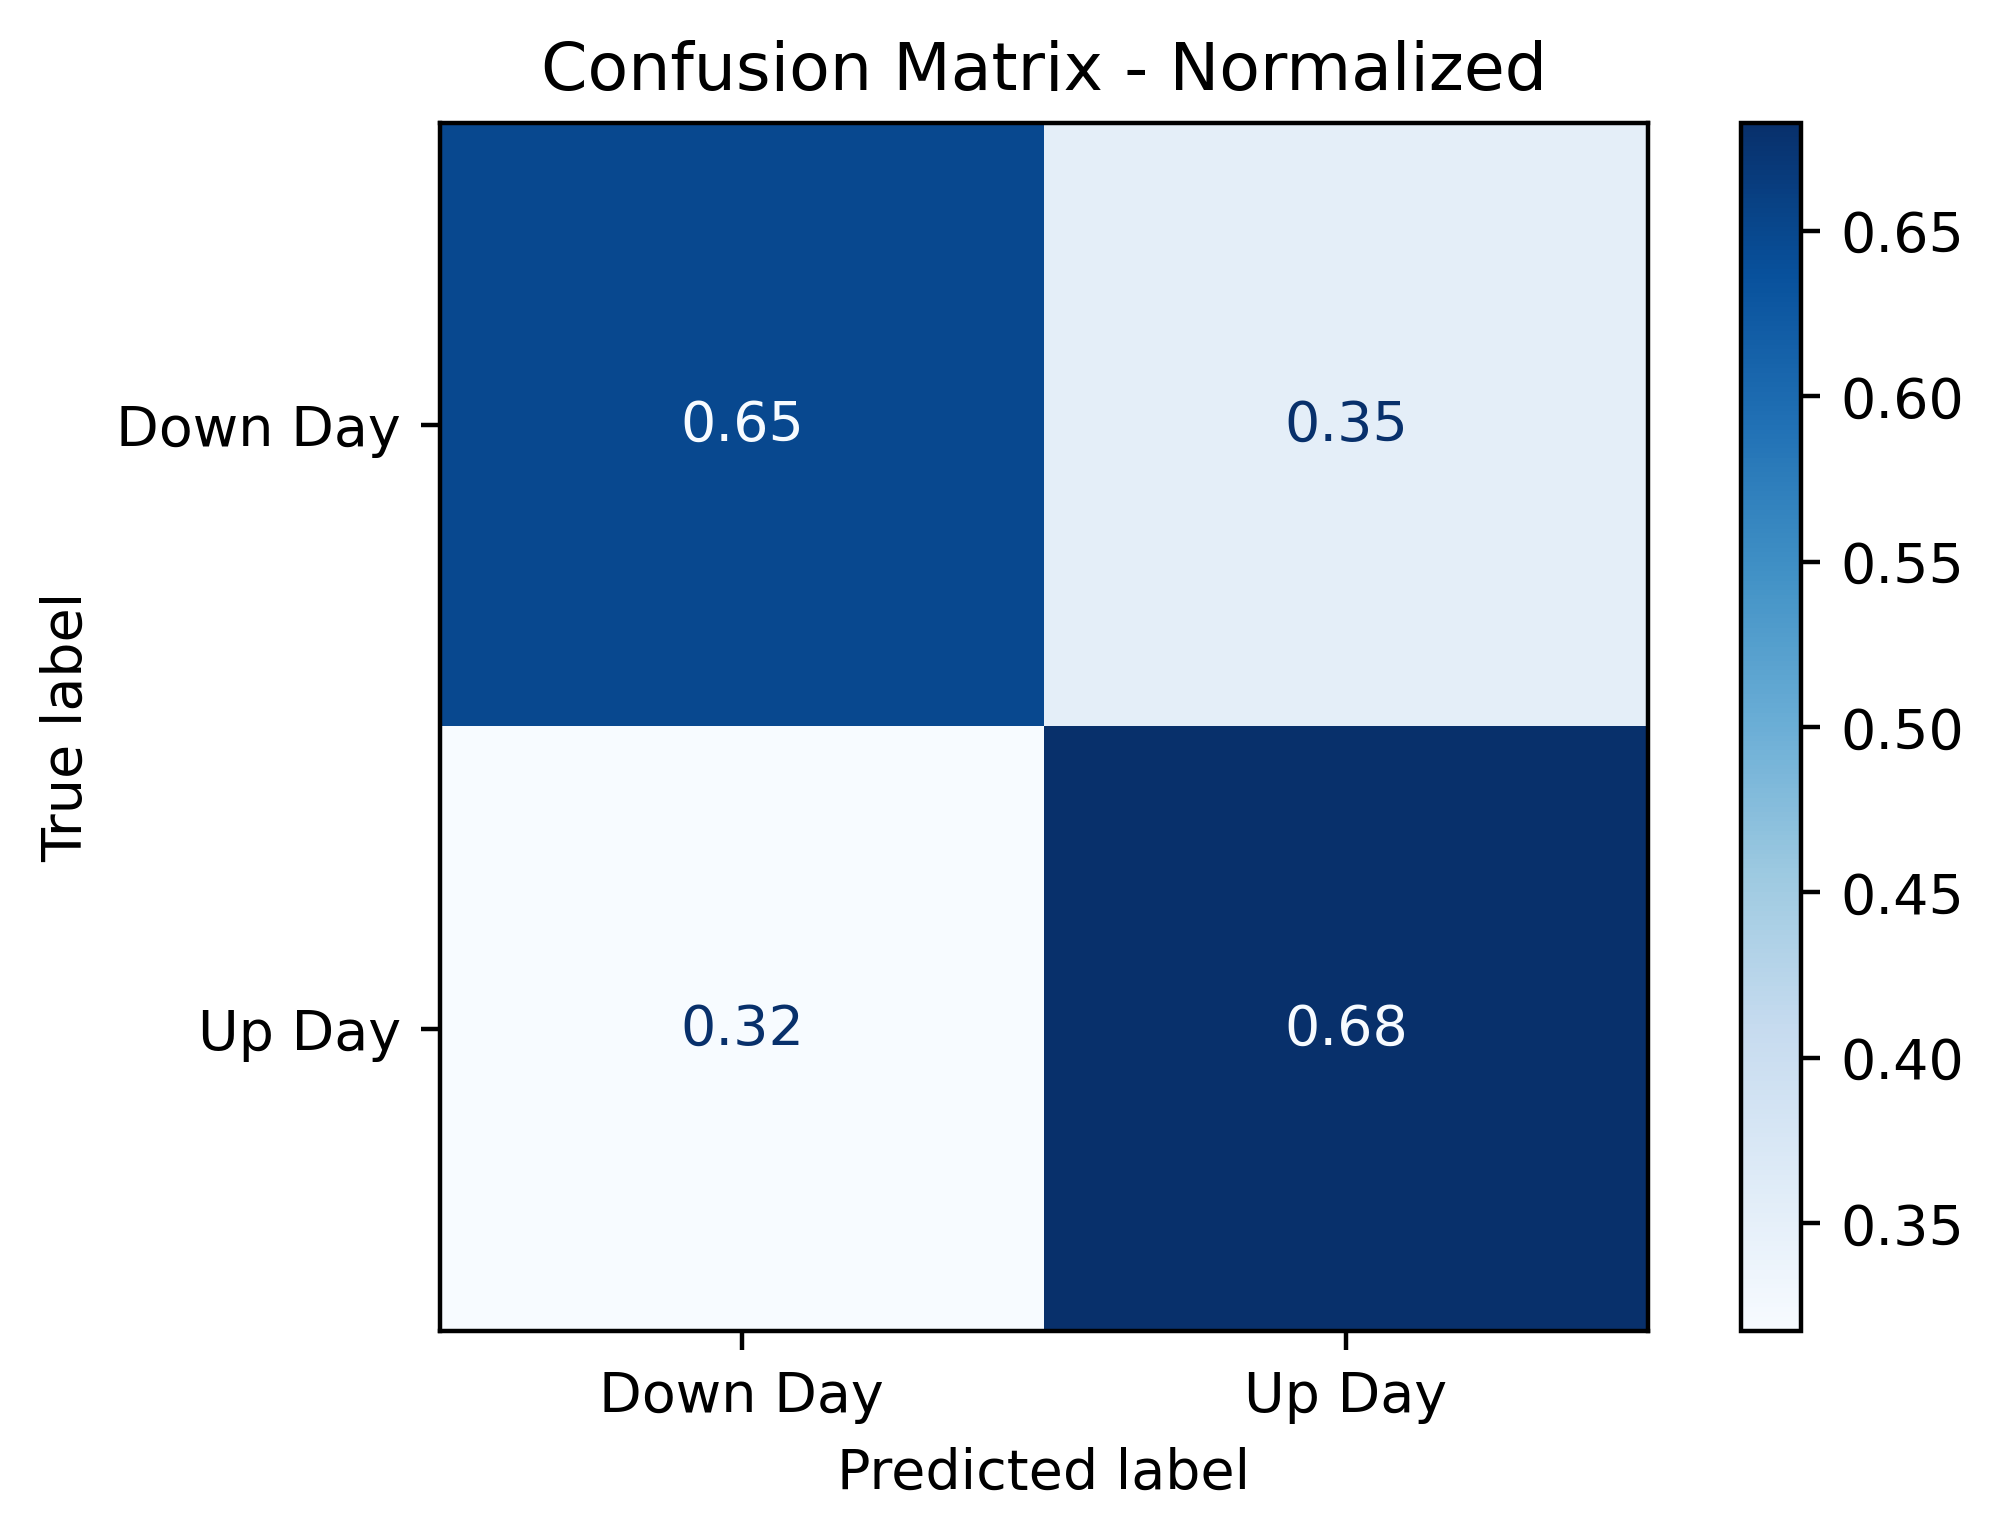

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

rf_matrix = confusion_matrix(y_test, y_pred)

true_negatives = rf_matrix[0][0]
false_negatives = rf_matrix[1][0]
true_positives = rf_matrix[1][1]
false_positives = rf_matrix[0][1]

accuracy = (true_negatives + true_positives) / (true_negatives + true_positives + false_negatives + false_positives)
percision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)
specificity = true_negatives / (true_negatives + false_positives)

print('Accuracy: {}'.format(float(accuracy)))
print('Percision: {}'.format(float(percision)))
print('Recall: {}'.format(float(recall)))
print('Specificity: {}'.format(float(specificity)))


disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Down Day', 'Up Day'], normalize = 'true', cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix - Normalized')
plt.show()



### Model Evaluation: Feature Importance ###
The last step in our model evaluation is determining which features explain most of our model. By looking at the feature_importances_property we can see the Gini-Based importance of each of our 5 indicator features. The Williams %R indicator has the most impact on our model but all these features have pretty similar importances with the Williams %R and the Price Rate Of Change only having a 4$ difference. 

In [33]:
# Calculate feature importance and store in pandas series
feature_imp = pd.Series(rand_frst_clf.feature_importances_, index=X_Cols.columns).sort_values(ascending=False)
feature_imp 


r_percent               0.232424
k_percent               0.209688
RSI                     0.204409
Price_Rate_Of_Change    0.178851
MACD                    0.174628
dtype: float64

# Final Recap #
Thanks for taking a look at this project, I definitly learned a lot throughout about the data science process and fundamental/technical financial analysis but still nowhere near the ability of a professional investor/stockpicker. We went through a lot in this project so let's try to do a quick high level recap of what we've accomplished

1. Fundamental Analysis
    - state of economy
    - financial statements
    - peer analysis
2. Technical Analysis
    - Momentum Indicators
    - Random Forest Model

By the end of this project we have a better understanding of how Meta is positioned in the markets by analyzing it's past performance and making comparisons with it's competitors. Based of our analysis we determined that we should currently hold off from buying and selling Meta but should purchase the stock whenever the p/e ratio drops below 13. We then trained a Random Forest model to classify up or down days based on price momentum indicators and can use that to predict the upcoming up and down days. There is definitly a lot more rigerous fundamental and technical analysis we can do but what we've accomplished is a simple building block for analyzing stocks, congrats!!!


